# Introduction:
* Loantap is a leading financial technology company based in India, specializing in providing flexible and innovative loan products to individuals and businesses. With a focus on customer-centric solutions, Loantap leverages technology to offer hassle-free borrowing experiences, including personal loans, salary advances, and flexible EMI options. Their commitment to transparency, speed, and convenience has established them as a trusted partner for borrowers seeking efficient financial solutions.

* LoanTap is at the forefront of offering tailored financial solutions to millennials.

* Their innovative approach seeks to harness data science for refining their credit underwriting process.

* The focus here is the Personal Loan segment. A deep dive into the dataset can reveal patterns in borrower behavior and creditworthiness.

* Analyzing this dataset can provide crucial insights into the financial behaviors, spending habits, and potential risk associated with each borrower.

* The insights gained can optimize loan disbursal, balancing customer outreach with risk management.

# **Exploratory Data Analysis**

Importing necessary libraries -

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind,chi2_contingency

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score,
    ConfusionMatrixDisplay, RocCurveDisplay,f1_score,recall_score,precision_score
)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', None)

1. **loan_amnt**: Amount borrower applied for.
2. **term**: Loan duration (36 or 60 months).
3. **int_rate**: Interest rate on loan.
4. **installment**: Monthly repayment amount.
5. **grade**: LoanTap assigned loan grade (Risk ratings by LoanTap.)
6. **sub_grade**: LoanTap assigned loan grade (Risk ratings by LoanTap.)
7. **emp_title**: Borrower's job title.
8. **emp_length**: Duration of borrower's employment (0-10 years).
9. **home_ownership**: Borrower's housing situation (own, rent, etc.).
10. **annual_inc**: Borrower's yearly income.
11. **verification_status**: Whether borrower's income was verified.
12. **issue_d**: Loan issuance month.
13. **loan_status**: Current status of the loan.
14. **purpose**: Borrower's reason for the loan.
15. **title**: The loan's title provided by the borrower.
16. **dti (Debt-to-Income ratio)**: Monthly debt vs. monthly income ratio.
17. **earliest_cr_line**: Date of borrower's oldest credit account.
18. **open_acc**: Number of borrower's active credit lines.
19. **pub_rec**: Negative records on borrower's public credit profile.
20. **revol_bal**: Total credit balance.
21. **revol_util**: Usage percentage of 'revolving' accounts like credit cards.
22. **total_acc**: Total number of borrower's credit lines.
23. **initial_list_status**: Loan's first category ('W' or 'F').
24. **application_type**: Individual or joint application.
25. **mort_acc**: Number of borrower's mortgages.
26. **pub_rec_bankruptcies**: Bankruptcy records for borrower.
27. **Address**: Borrower's location.

### Load the dataset -

In [4]:
lt_data = pd.read_csv('logistic_regression.csv')
#df = lt_data.copy()
lt_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


## Basic analysis of the dataset:

In [5]:
# Shape of the dataset -
print("Total No. of samples: ", lt_data.shape[0])
print("Total No. of features: ", lt_data.shape[1])

Total No. of samples:  396030
Total No. of features:  27


In [6]:
lt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [7]:
lt_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

**Observation:**

* There are no trailing or leading white spaces in the given features or column names

In [8]:
# Checking the distribution of outcome labels -a`
lt_data.loan_status.value_counts(normalize=True)*100

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

**Observation:**
* As we can see, there is an imbalance in the data.
* Approx 80% belongs to the class 0 : Which is loan fully paid.
* Approx 20% belongs to the class 1 : Which were charged off.

## Statistical summary of the dataset -

In [9]:
lt_data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [10]:
lt_data.describe(include='object').T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


## **Duplicate Detection:**

In [11]:
lt_data.duplicated().sum()

0

**Observation:**
* The dataset does not contain any duplicates.

## **Null Detection:**

In [12]:
lt_data.isna().sum().sort_values(ascending = False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1756
pub_rec_bankruptcies      535
revol_util                276
loan_amnt                   0
dti                         0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
purpose                     0
term                        0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
address                     0
dtype: int64

In [13]:
df_null_values = np.round((lt_data.isna().sum()/len(lt_data) * 100), 2)
df_null_values = df_null_values.reset_index().rename(columns={'index':'Features', 0:'Percentage(%)'})
df_null_values

,Features,Percentage(%)
0,loan_amnt,0.00
1,term,0.00
2,int_rate,0.00
3,installment,0.00
4,grade,0.00
5,sub_grade,0.00
6,emp_title,5.79
7,emp_length,4.62
8,home_ownership,0.00
9,annual_inc,0.00


In [14]:
# Create fucntion for finding the null values and the percentages of it:
def missing_data(df):
    # sum:
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    # Percentage:
    percent_missing_df = (df.isnull().sum()/df.isna().count()*100).sort_values(ascending=False)
    # concat:
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percentage'])
    return missing_data_df

Missing_data_pct = missing_data(lt_data)
Missing_data_pct[Missing_data_pct['Total']>0]

,Total,Percentage
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1756,0.443401
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


* **Insight:**
* mort_acc has 9.54% missing values
* emp_title has 5.78% missing values
* emp_length has 4.62% missing values
* title has 0.44% missing values
* pub_rec_bankruptcies has 0.13% missing values
* revol_until has 0.06% missing values


### **Visually check the Missing data:**

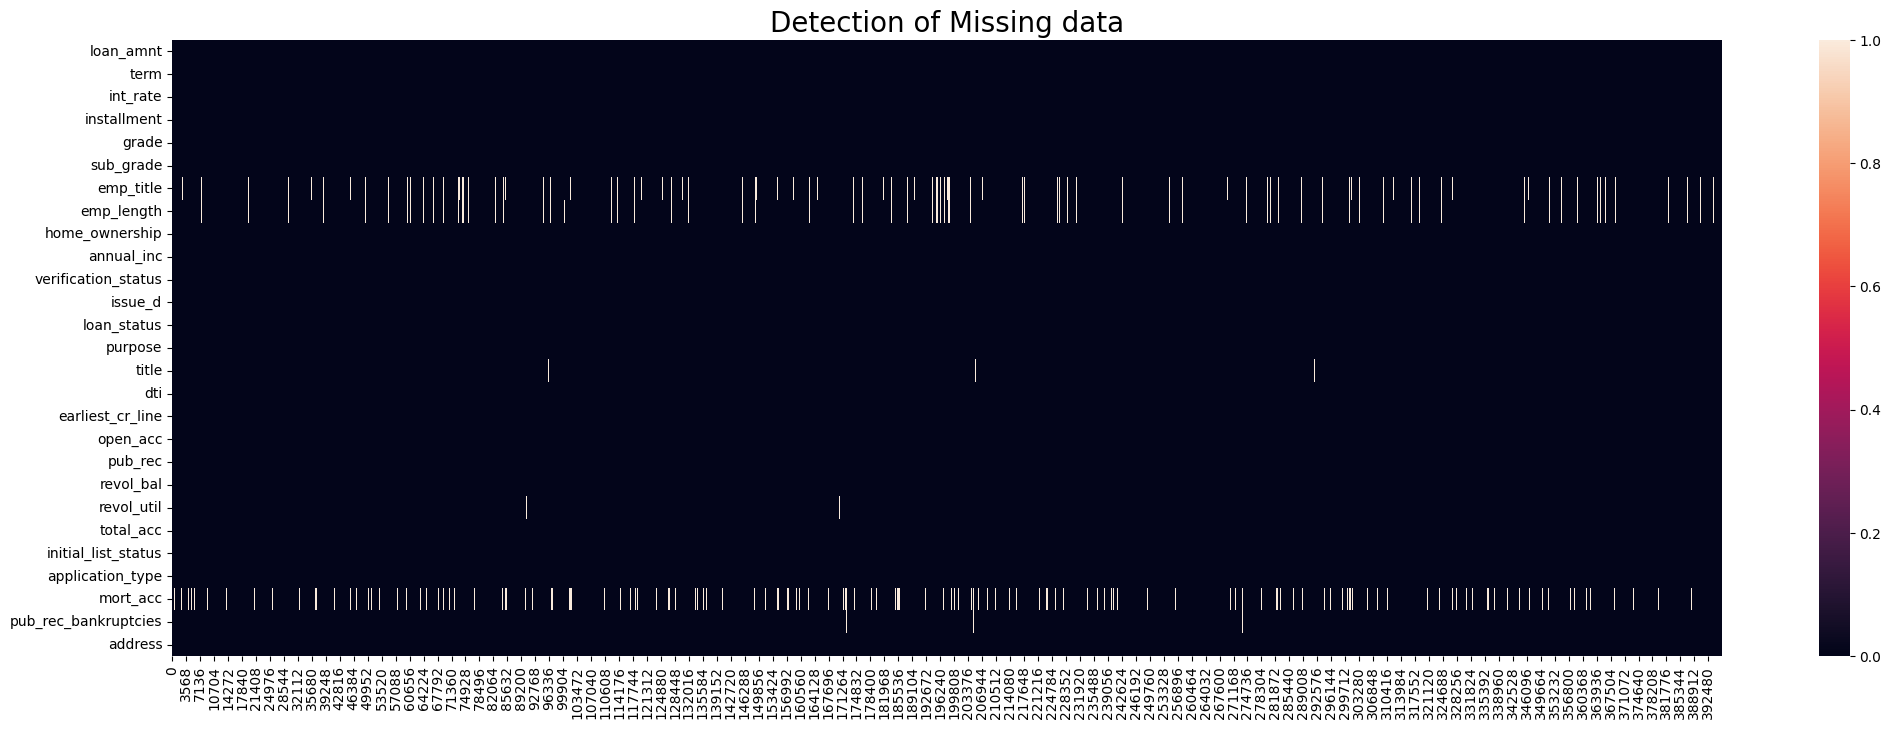

In [15]:
plt.figure(figsize=(25,8))
sns.heatmap(lt_data.isnull().T)
plt.title('Detection of Missing data',fontsize=20)
plt.show()

In [16]:
lt_data.isna().sum().sum()

81590

**Observation:**
* Since, There are 81590 rows are null , we can't directly use pandas dropna.

### Checking for Unique values of data:

In [17]:
objectTypeFeatures = [] 
for i in lt_data.columns:  
    if lt_data[i].dtype == 'object':    
        objectTypeFeatures.append(i) 
print('Categorical Features:') 
for i in objectTypeFeatures:  
    print(i)

Categorical Features:
term
grade
sub_grade
emp_title
emp_length
home_ownership
verification_status
issue_d
loan_status
purpose
title
earliest_cr_line
initial_list_status
application_type
address


In [18]:
for _ in objectTypeFeatures: 
    print('-'*50) 
    print(f'Column Name: {_}') 
    print(f'Length  : {lt_data[_].nunique()}') 
    print(f'Values : {lt_data[_].unique()}')

--------------------------------------------------
Column Name: term
Length  : 2
Values : [' 36 months' ' 60 months']
--------------------------------------------------
Column Name: grade
Length  : 7
Values : ['B' 'A' 'C' 'E' 'D' 'F' 'G']
--------------------------------------------------
Column Name: sub_grade
Length  : 35
Values : ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']
--------------------------------------------------
Column Name: emp_title
Length  : 173105
Values : ['Marketing' 'Credit analyst ' 'Statistician' ...
 "Michael's Arts & Crafts" 'licensed bankere' 'Gracon Services, Inc']
--------------------------------------------------
Column Name: emp_length
Length  : 11
Values : ['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]
--------------------------------------------------

## Copy of original data set:

In [19]:
df = lt_data.copy()

# Univariate Analysis:

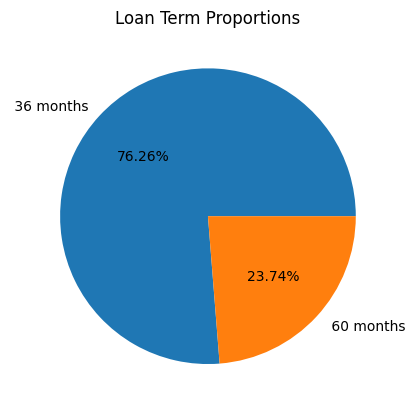

term
36 months    302005
60 months     94025
Name: count, dtype: int64

In [20]:
df_term = df['term'].value_counts() 
plt.pie(df_term, labels = df_term.index, autopct = '%0.2f%%') # Plot the pie plot for the Term columns
plt.title('Loan Term Proportions') 
plt.show() 
df_term

**Observation:**
* 76.26% of loans were given for 36 months terms
* 23.74% of loans were given for 60 months terms

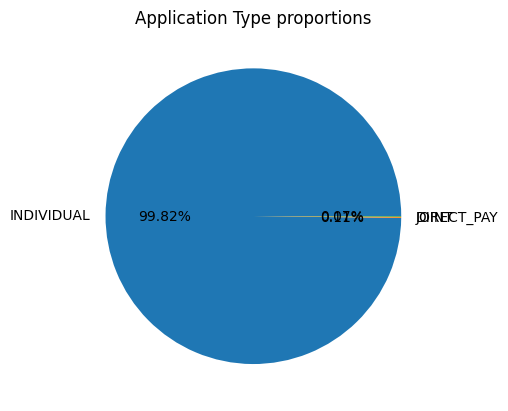

,application_type,count,Percent
0,INDIVIDUAL,395319,99.820468
1,JOINT,425,0.107315
2,DIRECT_PAY,286,0.072217


In [21]:
#application_type 
df_apply_type = df['application_type'].value_counts() 
plt.pie(df_apply_type, labels = df_apply_type.index, autopct='%0.2f%%') 
plt.title('Application Type proportions') 
plt.show()

df_apply_type = df_apply_type.reset_index() 
df_apply_type['Percent'] = df_apply_type['count'].astype('int')/sum(df_apply_type['count']) * 100 
df_apply_type

**Observation:** 
* Most of the loans are by 'Individual' (99.82%) loans and very few are from
joint and direct pay.

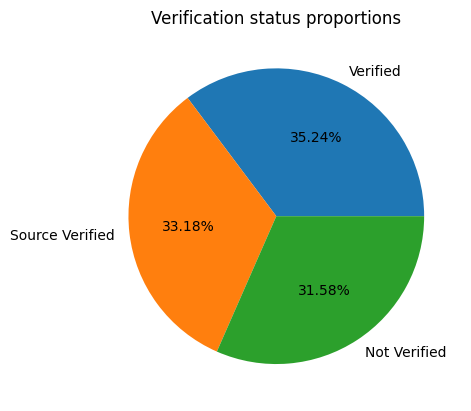

verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64

In [22]:
# verification Status:
df_verify_status = df['verification_status'].value_counts()  
plt.pie(df_verify_status, labels = df_verify_status.index, autopct='%0.2f%%') 
plt.title('Verification status proportions') 
plt.show() 
df_verify_status

**Observations:**
* Verified, Source Verified and Not Verified all are approximately equal in proportion.

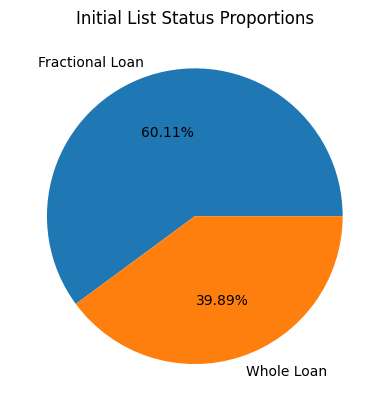

initial_list_status
f    238066
w    157964
Name: count, dtype: int64

In [23]:
# Initial liststaus:
df_init_lst_status = df['initial_list_status'].value_counts() 
plt.pie(df_init_lst_status, labels = ['Fractional Loan', 'Whole Loan'], autopct='%0.2f%%') 
plt.title('Initial List Status Proportions') 
plt.show() 
df_init_lst_status

**Observation:** 
* About 60.11% of loans are Fractional whereas 39.89% are whole loans.

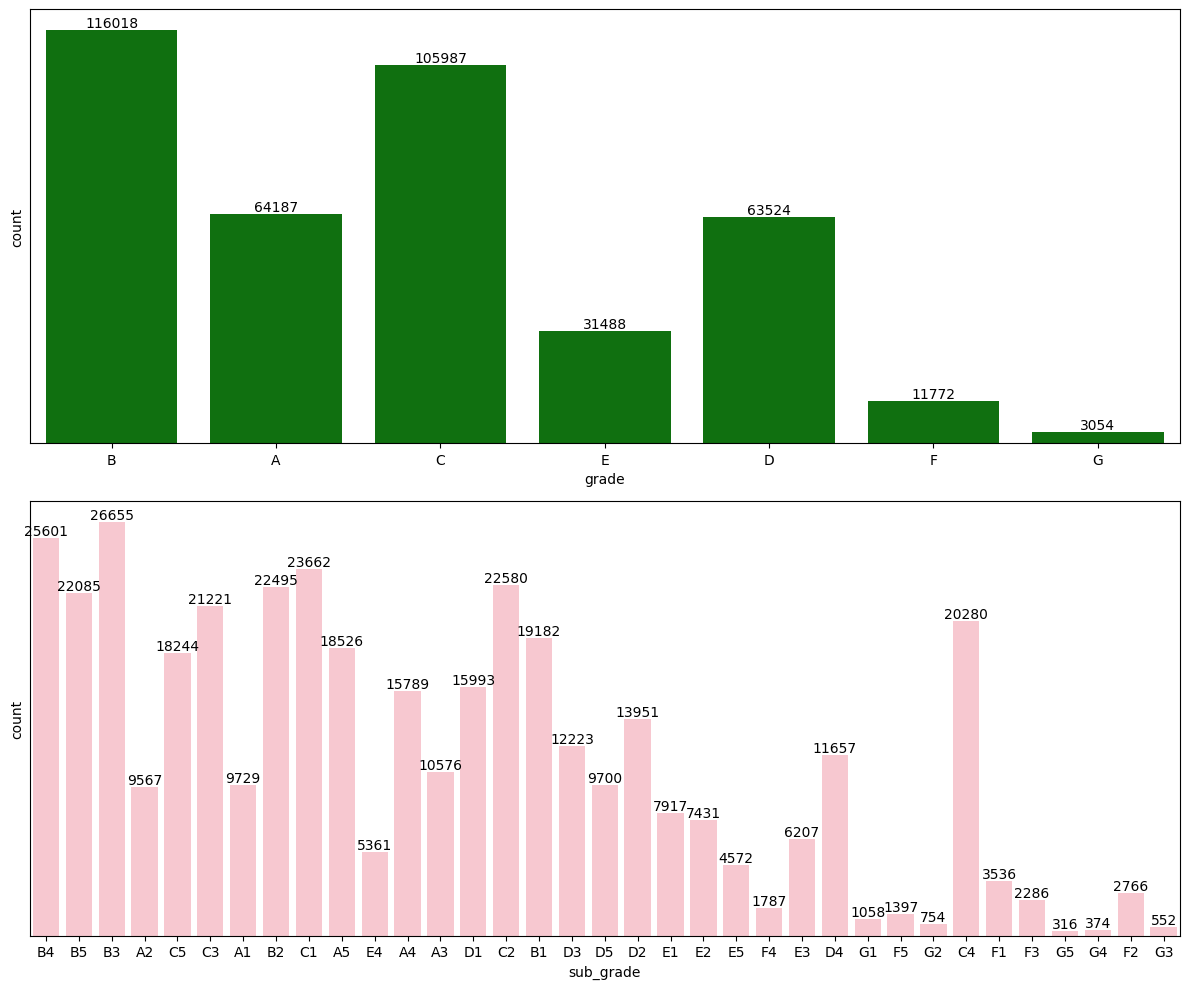

In [24]:
plt.figure(figsize=(12,10))
# Grade:
plt.subplot(211)
ax = sns.countplot(data =df , x = 'grade', color = 'green')
plt.yticks([])
ax.bar_label(ax.containers[0], label_type='edge',fmt='%d')
# Sub_grade: 
plt.subplot(212)
ax = sns.countplot(data = df , x = 'sub_grade', color = 'pink')
plt.yticks([])
ax.bar_label(ax.containers[0], label_type='edge',fmt='%d')
plt.tight_layout()

plt.show()

**Observation:** 

* **From the 1st plot(All Grades)**:
* Grade B has the highest count, followed by C and A.
* Grades A and D have moderate counts.
* Grades F and G are having the lowest counts, with G being the significantly smallest.

* **From the 2nd plot**(Subgrades):
* A: Subgrade A4 has the highest count, followed by subgrades A3 and A1 following.
* B: Subgrade B3 has the highest count, closely followed by B4, with the remaining subgrades slightly lower.
* C: Subgrades C3 and C1 have similar high counts, while C4, C5, and C2 have lower but fairly even distributions.
* D: D1 has the highest count, with D5 the lowest among D subgrades.
* E: Subgrade E1 has the highest count, while E3 has the lowest.
* F: Subgrade F1 has the highest count, with F4 being the lowest among F subgrades.
* G: Subgrade G1 has the highest count, with G3 having the lowest among G subgrades.

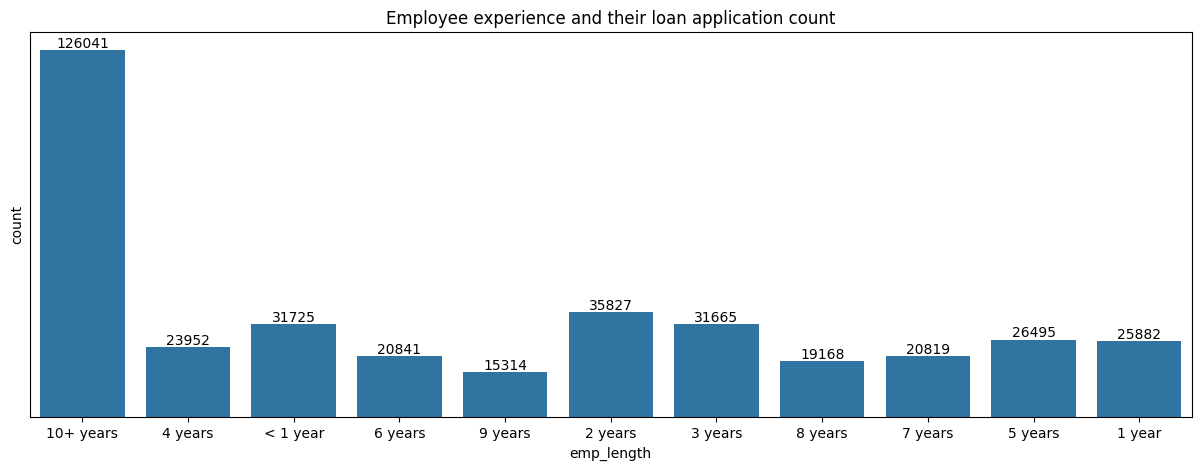

In [25]:
# emp_length
plt.figure(figsize=(15,5)) 
ax = sns.countplot(data=df, x='emp_length') 
plt.title('Employee experience and their loan application count')
ax.bar_label(ax.containers[0], label_type='edge',fmt='%d')
plt.yticks([])
plt.show()

**Observation:** 
* From the above plot Employees with 10+ years of experience have the highest number of loan applications.
* The number of loan applications generally decreases as the employee experience decreases.
* Employees with two(2) year of experience have the second-highest number of loan applications.
* And employees with less than one(<1) years of experience have the third-highest number of loan applications.
* The number of loan applications for Employees with 4, 6, 9, 8, 7, 5 and 1 years of experience are relatively similar.
* Overall, the chart suggests that employees with more experience tend to apply for fewer loans, while those with less experience apply for more loans.

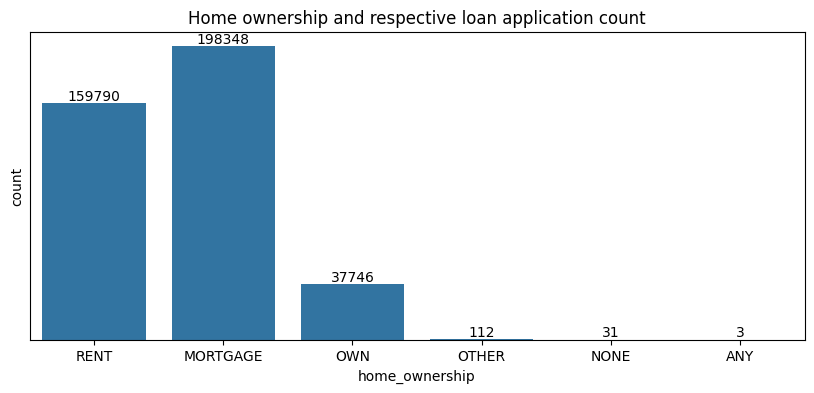

In [26]:
# home_ownership 
plt.figure(figsize=(10,4)) 
ax = sns.countplot(data=df, x='home_ownership') 
ax.bar_label(ax.containers[0], label_type='edge',fmt='%d')
plt.yticks([])
plt.title('Home ownership and respective loan application count') 

plt.show()

**Observation:** 
* Employees who have a mortgage have the highest number of loan applications.
* Employees who rent their homes have the second- highest number of loan applications.
* Employees who own their homes outright have the third-highest number of loan applications.
* The number of loan applications is significantly lower for employees who have "other," "none," or "any" as their home ownership status.
* Overall, the chart suggests that employees who have rent or mortgage are more likely to apply for loans compared to those who own their homes outright or have other home ownership statuses.

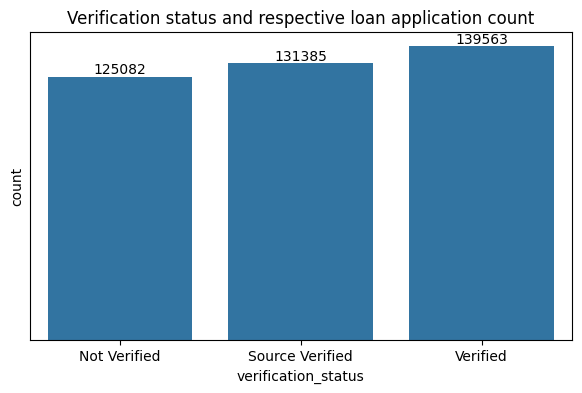

In [27]:
#verification_status 
plt.figure(figsize=(7,4)) 
ax = sns.countplot(data=df, x='verification_status') 
ax.bar_label(ax.containers[0], label_type='edge',fmt='%d')
plt.yticks([])
plt.title('Verification status and respective loan application count') 
plt.show()

**Observation:** 
* The number of loan applications is highest for verified applications.
* The number of loan applications is second highest for source verified applications.
* The number of loan applications is lowest for not verified applications.
* Overall, the chart suggests that the more verified an application is, the higher the number of loan applications.

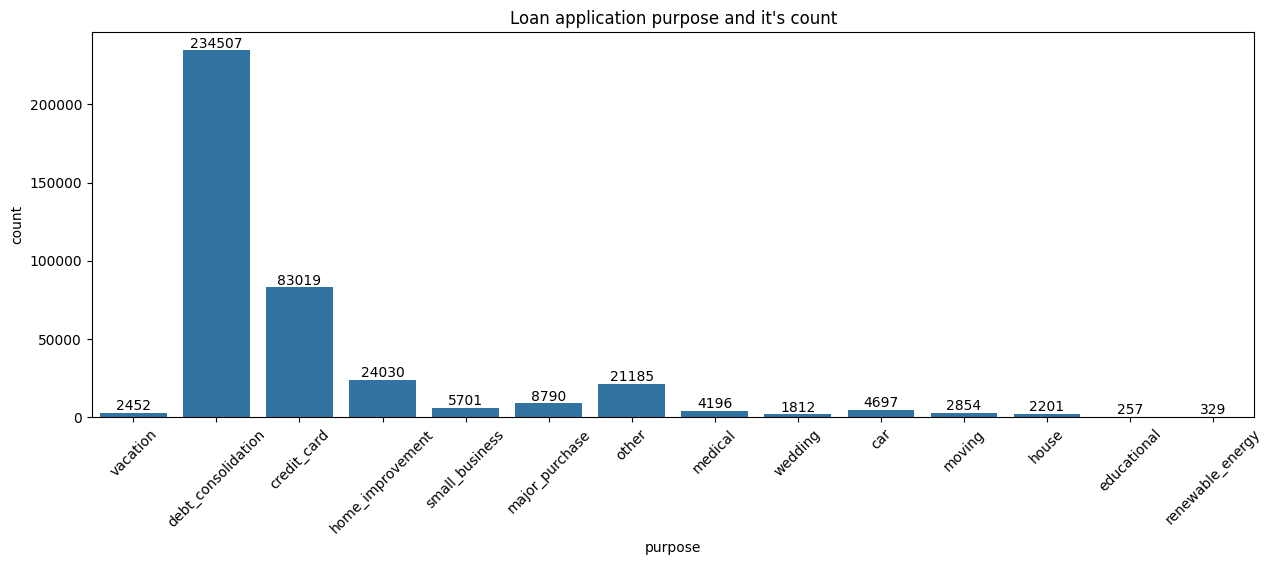

In [28]:
#purpose 
plt.figure(figsize=(15,5)) 
ax = sns.countplot(data=df,  x='purpose')
ax.bar_label(ax.containers[0], label_type='edge',fmt='%d')
plt.xticks(rotation=45) 
plt.title("Loan application purpose and it's count") 
plt.show()

**Observation:** 
* From the above plot we observe that most loan applications are for debt consolidation, credit card, and home improvement purposes.
* Debt consolidation is the most common purpose for loan applications.
* Credit card and home improvement are the second and third most common purposes for loan applications.
* Other purposes such as vacation, small business, major purchase, other, medical, wedding, moving, house, educational, and renewable energy have significantly fewer loan applications compared to debt consolidation, credit card, and home improvement.


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [30]:
def hist_with_annotation(df, xaxis, binwidth=None, fs=None, plot_title=None): 
    plt.figure(figsize=fs) 
    ax = sns.histplot(data=df, x = xaxis, binwidth = binwidth, kde=True) 
    plt.title(plot_title) 
    plt.yticks([])
    ax.bar_label(ax.containers[0], label_type='edge',fmt='%d') 
    plt.show()

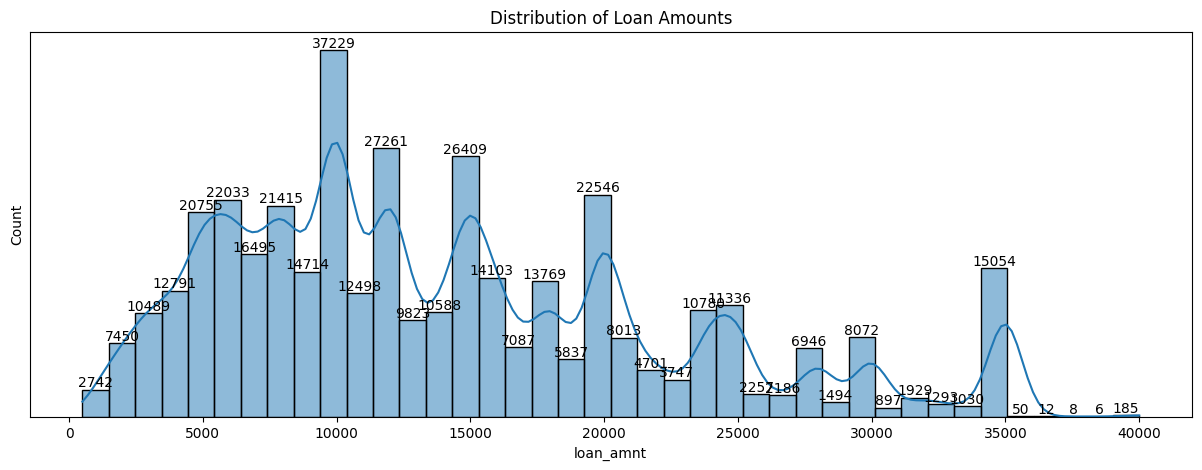

In [31]:
title = 'Distribution of Loan Amounts'
hist_with_annotation(df,  'loan_amnt', binwidth=1000, fs =(15,5), plot_title=title)

**Observations:** 
* The distribution plot shows multiple heaps, with the highest peak around 35,000, where the count reaches approximately 37,229.
* Several other high-count loan amounts are observed around 10,000, 15,000, 20,000, and 25,000, indicating popular loan amounts in these ranges.
* There is a general tapering in counts for loans greater than 30,000, except for a secondary peak around 35,000, possibly reflecting specific loan product preferences or caps. Smaller counts are observed in the 30,000 to 40,000 range, with the lowest at 40,000

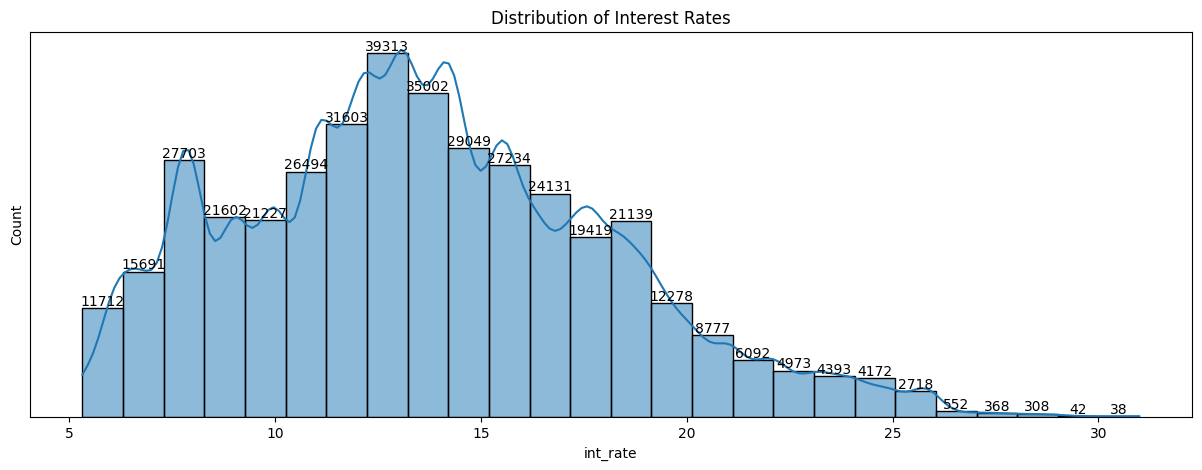

In [32]:
title = 'Distribution of Interest Rates'
hist_with_annotation(df,  'int_rate', binwidth=1, fs =(15,5), plot_title=title)

**Observations:** 
* The distribution is roughly unimodal with a peak around 13-14%, where the count reaches the highest at 39,313.
* A significant portion of loans has interest rates between 5% and 20%, with counts gradually decreasing beyond 20%.
* There is a steep drop-off in counts for interest rates above 20%, with only a few loans above 25%, suggesting that high-interest loans are less common.

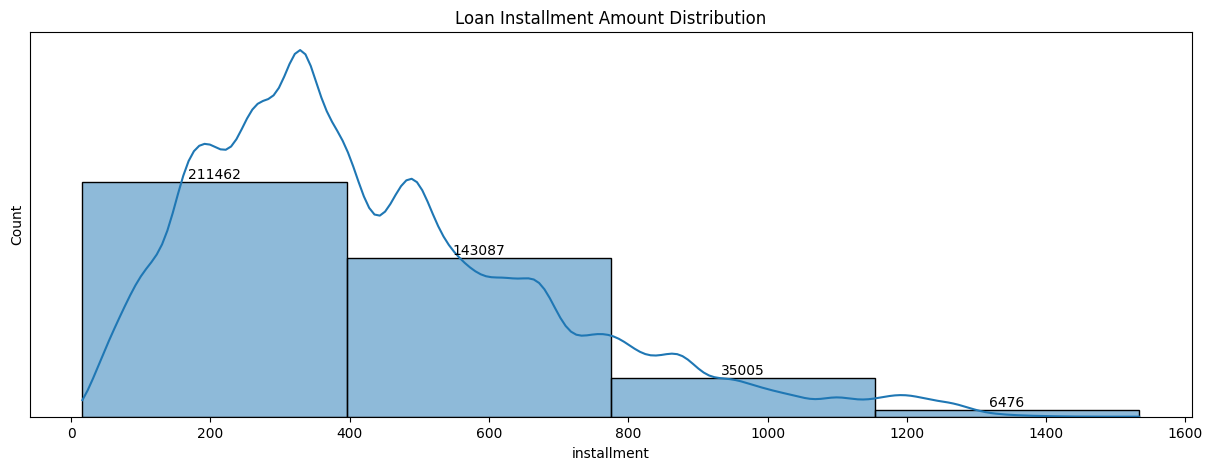

In [33]:
title = 'Loan Installment Amount Distribution'
hist_with_annotation(df,  'installment', binwidth = 365, fs =(15,5), plot_title=title)

**Observations:** 
* The distribution of loan installment amounts is right-skewed, meaning there are more loans with smaller installment amounts.
* The majority of loans have installment amounts between 0 and 400.
* And there are fewer loans with installment amounts greater than 400.
* The chart shows a significant drop in the number of loans as the installment amount increases.

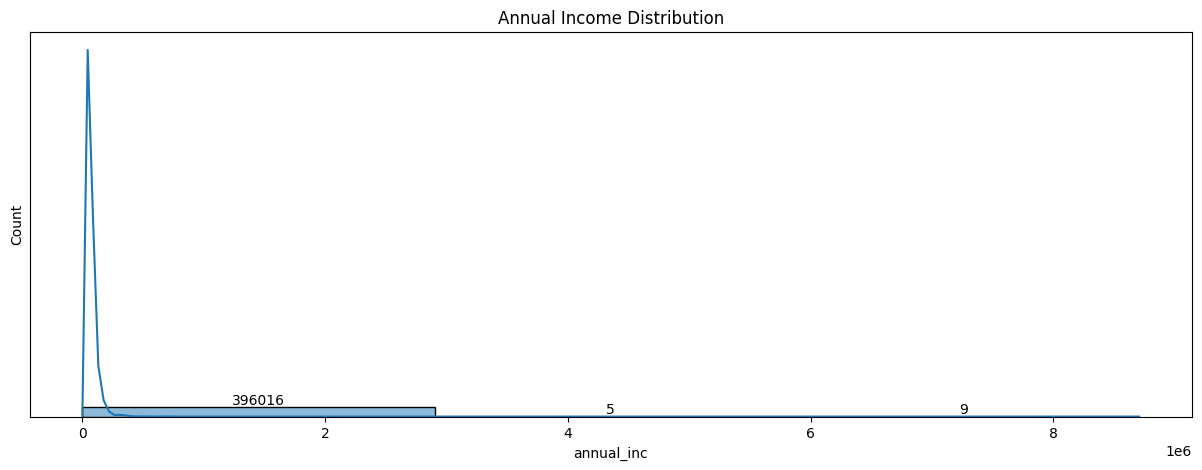

In [34]:
title =  "Annual Income Distribution"
hist_with_annotation(df,  'annual_inc', binwidth=3000000, fs =(15,5), plot_title=title)

**Observations:** 
* The distribution is highly right-skewed, meaning that most individuals have relatively low annual incomes.
* There are a few individuals with very high annual incomes, which are represented by the long tail on the right side of the distribution.
* The majority of individuals have annual incomes below 2 million. There is a significant drop in the number of individuals as the annual income increases.

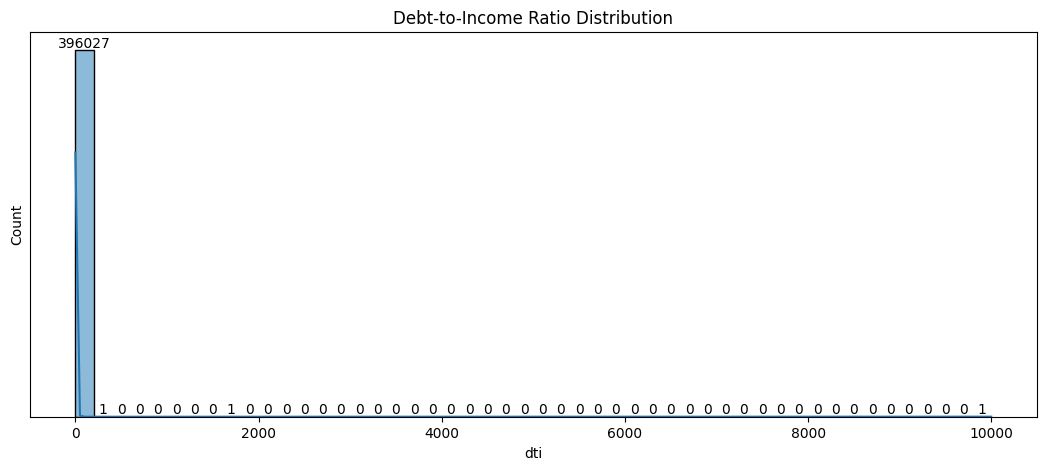

In [35]:
title = 'Debt-to-Income Ratio Distribution' 
hist_with_annotation(df, 'dti', binwidth = 200,  fs=(13,5), plot_title = title)

**Observations:** 
* The above distribution is very evidentily right-skewed, with a large number of individuals having a DTI ratio of 0.
* There are a few individuals with higher DTI ratios, but the majority of individuals have a DTI ratio below 1000.
* The distribution is very sparse, with most of the bars having a count of 0.

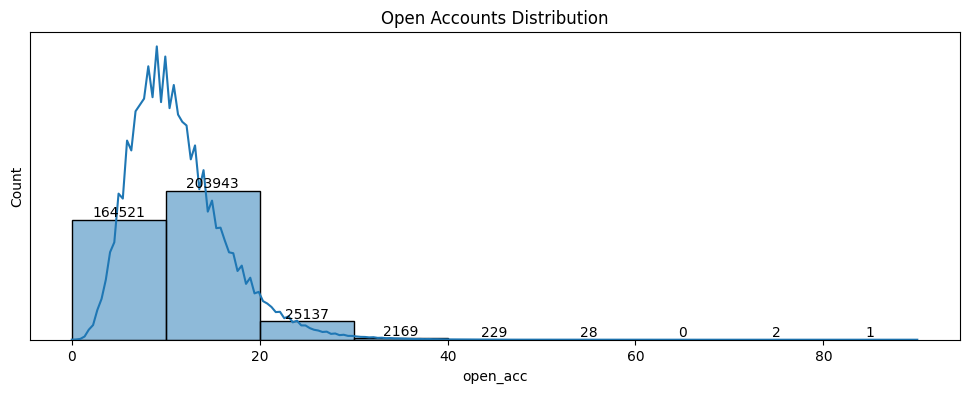

In [36]:
#open_acc 
title = 'Open Accounts Distribution' 
hist_with_annotation(df, 'open_acc', binwidth=10,  fs=(12,4), plot_title = title)

**Observations:**
* The distribution is right-skewed, meaning that most individuals have a relatively small number of open accounts.
* The majority of individuals are between 0 and 20 open accounts.
* There are a few individuals with a very large number of open accounts, which are represented by the long tail on the right side of the distribution.

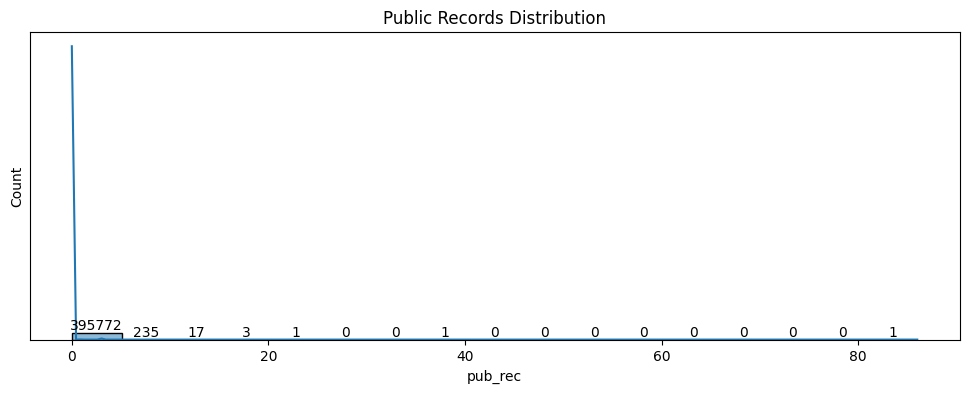

In [37]:
title = 'Public Records Distribution'
hist_with_annotation(df,  'pub_rec', binwidth=5, fs =(12,4), plot_title=title)

**Observation:**
* The distribution is highly right-skewed, meaning that most individuals have a very small number of public records.
* The majority of individuals have 0 public records.
* There are only few individuals with a larger number of public records, but the distribution is very sparse.
* In short, the plot shows that most individuals have a clean credit history with no public records. However, there are a few individuals with a larger number of public records, which could be a cause for concern.

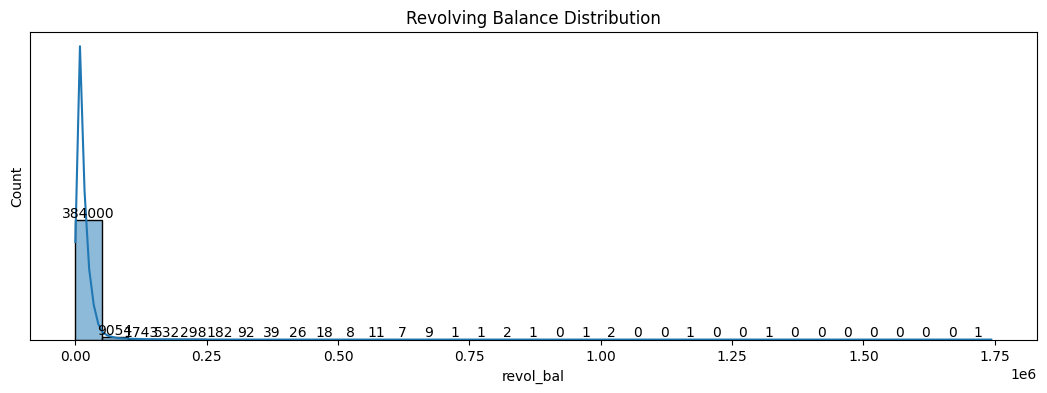

In [38]:
title = 'Revolving Balance Distribution' 
hist_with_annotation(df, 'revol_bal', binwidth = 50000,  fs=(13,4), plot_title=title)

**Observations:** 
* The distribution is highly right-skewed, meaning that most individuals have a low revolving balance.
* The majority of individuals have a revolving balance of below 250,000.
* There are a few individuals with a very high revolving balance, which are represented by the long tail on the right side of the distribution.
* The distribution is very sparse, with most of the bars having a count of 0.
* Overall, the chart shows that most individuals have a manageable revolving balance. However, there are a few individuals with a very high revolving balance, which could be a cause for concern.

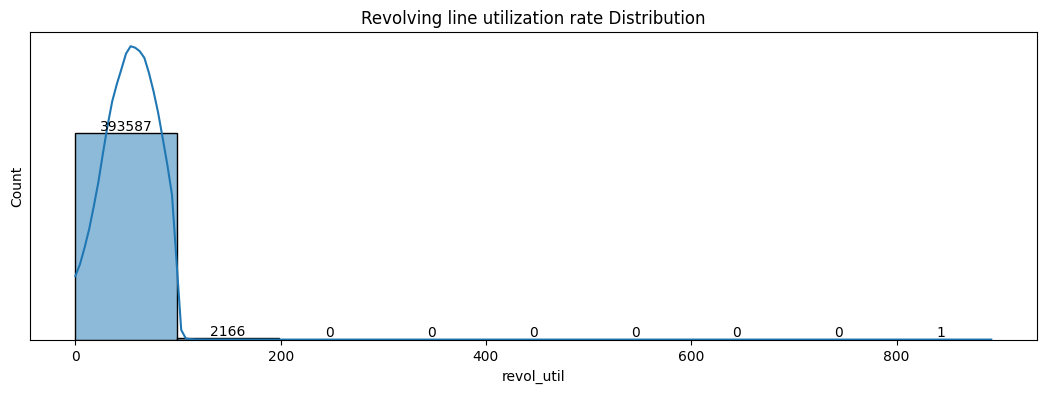

In [39]:
title = 'Revolving line utilization rate Distribution' 
hist_with_annotation(df, 'revol_util', binwidth=100,  fs=(13,4), plot_title = title)

**Observations:** 
* The distribution is highly right-skewed, meaning that most individuals have a low revolving utilization.
* The majority of individuals have a revolving utilization below 200.
* There are a few individuals with a very high revolving utilization.(which are represented by the long tail on the right side of the distribution)
* The distribution is very sparse, with most of the bars having a count of 0.
* Overall, the chart shows that most individuals have a manageable revolving line utilization rate. However, there are a few individuals with a very high revolving utilization, which could be a cause for concern.

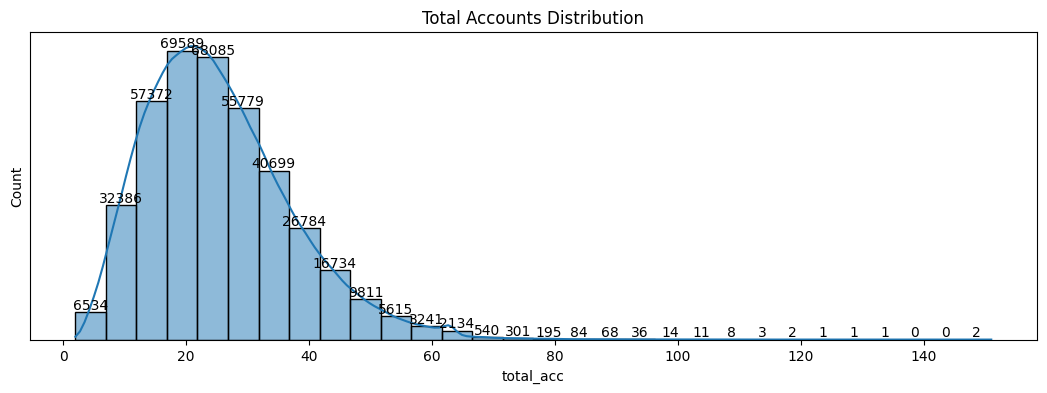

In [40]:
title = 'Total Accounts Distribution' 
hist_with_annotation(df, 'total_acc', binwidth = 5,  fs=(13,4), plot_title = title)

**Observations:**
* The distribution is right-skewed, meaning that most individuals have a relatively small number of total accounts.
* The majority of individuals have between 10 and 50 total accounts.
* There are a few individuals with a very large number of total accounts, which are represented by the long tail on the right side of the distribution.
* The distribution is very sparse, with most of the bars having a count of 0.
* Finally, the chart shows that most individuals have a manageable number of overall accounts. However, there are a few individuals with a very large number of total accounts, which could be a cause for concern.

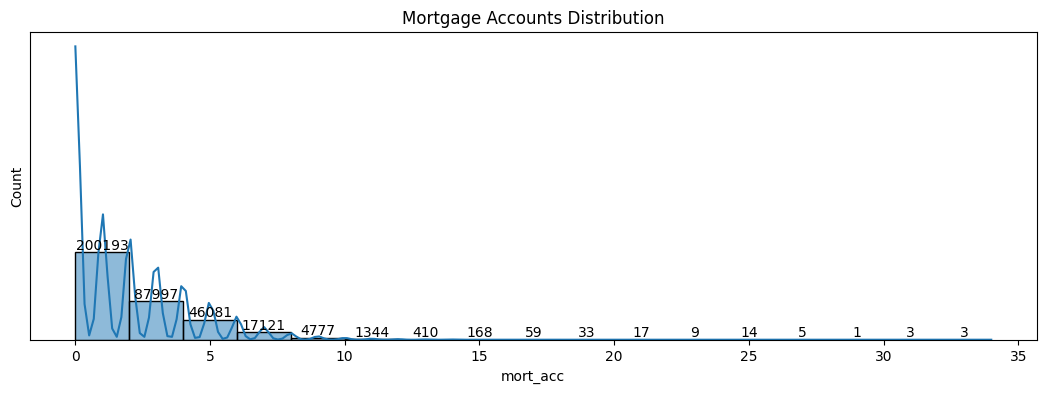

In [41]:
title = 'Mortgage Accounts Distribution' 
hist_with_annotation(df, 'mort_acc', binwidth=2,  fs=(13,4), plot_title = title)

**Observations:** 
* From The distribution plot we can observe that it is highly right-skewed, meaning that most individuals have a very small number of mortgage accounts.
* The majority of individuals have 0 mortgage accounts.
* There are a few individuals with a larger number of mortgage accounts, but the distribution is very sparse.
* Overall, the chart shows that most individuals have a clean credit history with no mortgage accounts.
* However, there are a few individuals with a larger number of mortgage accounts, which could be a cause for concern.

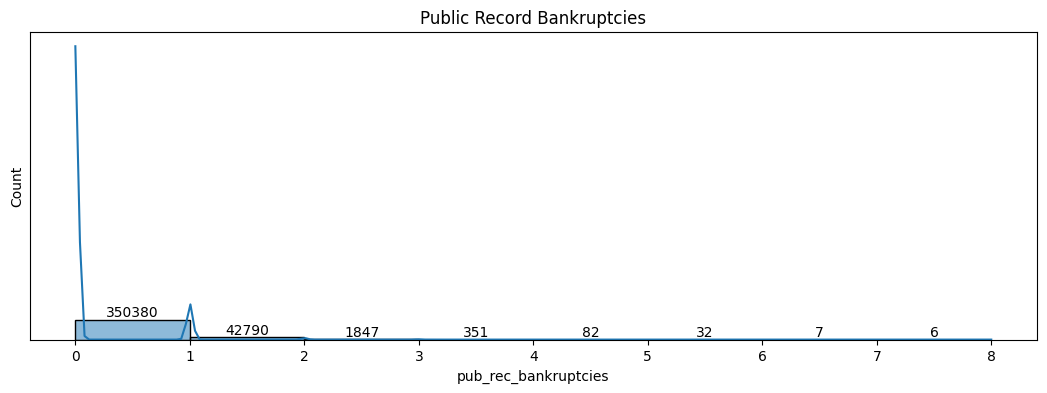

In [42]:
title = 'Public Record Bankruptcies'
hist_with_annotation(df, 'pub_rec_bankruptcies', binwidth=1,  fs=(13,4), plot_title = title)

**Observations:** 
* From The distribution plot we can observe that it is highly right-skewed (most individuals have a very small number of public record bankruptcies).
* The majority of individuals have 0 public record bankruptcies.
* There are a few individuals with a larger number of public record bankruptcies, but the distribution is very sparse.
* Finally we can observe that, the chart shows that most individuals have a clean credit history with no public record bankruptcies(0 bankruptcies).
* However, there are a few individuals with a larger number of public record bankruptcies, which could be a cause for concern.

#  **Bivariate Analysis**

,term,loan_status,count
0,36 months,Fully Paid,254365
1,60 months,Fully Paid,63992
2,36 months,Charged Off,47640
3,60 months,Charged Off,30033


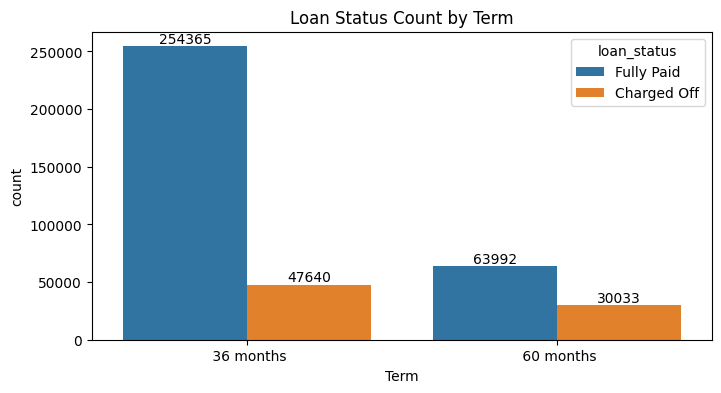

In [43]:
df_loan_term_status = df[['term','loan_status']] 
df_loan_term_status_count = df_loan_term_status.value_counts().reset_index() 
display(df_loan_term_status_count) 
# plot
plt.figure(figsize=(8, 4)) 
ax = sns.barplot(x='term', y='count', hue='loan_status', data=df_loan_term_status_count) 
#ax.bar_label(ax.containers[0], label_type='edge',fmt='%d')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%d')
plt.title('Loan Status Count by Term') 
plt.xlabel('Term') 
plt.show()

**Observation:**  
* Most of the people have took loans for 36 months term plan(duration).
* And people with 60 months loan term plan are more riskier.

,grade,count_by_group,loan_status,grp_loan_status_count,pecent
0,B,116018,Fully Paid,101431,87.426951
1,C,105987,Fully Paid,83538,78.819100
2,A,64187,Fully Paid,60151,93.712122
3,D,63524,Fully Paid,45186,71.132171
4,C,105987,Charged Off,22449,21.180900
5,E,31488,Fully Paid,19723,62.636560
6,D,63524,Charged Off,18338,28.867829
7,B,116018,Charged Off,14587,12.573049
8,E,31488,Charged Off,11765,37.363440
9,F,11772,Fully Paid,6735,57.212029


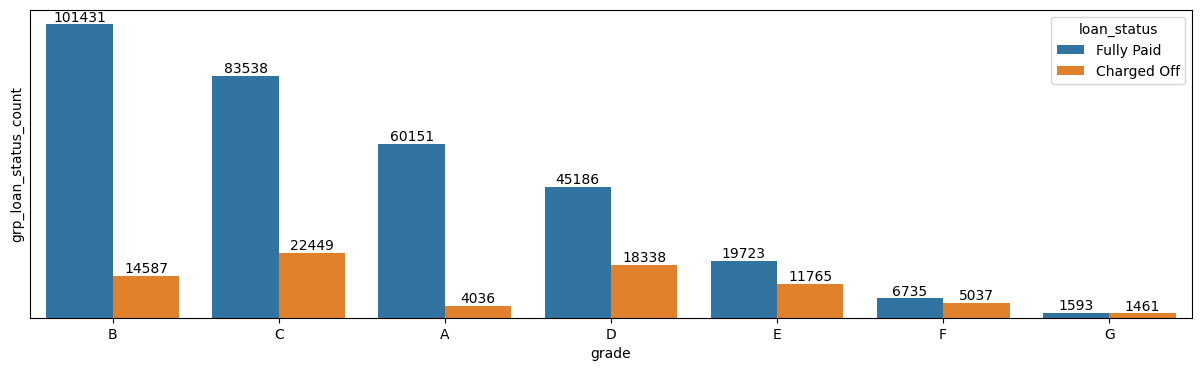

In [44]:
df_grade_counts = df[['grade']].value_counts().reset_index() 
df_grade_counts.rename(columns = {'count':'count_by_group'}, inplace=True) 

df_loan_grade_status = df[['grade','loan_status']].value_counts().reset_index() 
df_loan_grade_status.rename({'count':'grp_loan_status_count'}, axis=1, inplace=True) 

df_merged = pd.merge(df_grade_counts, df_loan_grade_status, on='grade', how='right') 
df_merged['pecent'] = (df_merged['grp_loan_status_count']/ df_merged['count_by_group'])*100 
display(df_merged) 
np.round(df_merged,2) 

plt.figure(figsize=(15,4)) 
ax = sns.barplot(x='grade', y='grp_loan_status_count', hue='loan_status', data=df_merged) 
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%d')
plt.yticks([])
plt.show()

In [45]:
df[['grade', 'loan_status']].value_counts()

grade  loan_status
B      Fully Paid     101431
C      Fully Paid      83538
A      Fully Paid      60151
D      Fully Paid      45186
C      Charged Off     22449
E      Fully Paid      19723
D      Charged Off     18338
B      Charged Off     14587
E      Charged Off     11765
F      Fully Paid       6735
       Charged Off      5037
A      Charged Off      4036
G      Fully Paid       1593
       Charged Off      1461
Name: count, dtype: int64

**Observation:**
* Grade B Dominates in Loan Count: Grade B has the highest number of loans for both Fully Paid and Charged Off statuses, with Fully Paid loans significantly outnumbering Charged Off.
* Grade C is the Second Most Popular:Grade C follows closely in loan counts, with a noticeable proportion of Charged Off loans compared to Fully Paid.
* Loan Count Decreases as Grade Declines:

As we move from Grade A to Grade G, the total number of loans (both Fully Paid and Charged Off) decreases significantly.

* High Success Rate for Lower Grades (A ,B & C): For Grades C and B, the Fully Paid loans are substantially higher than Charged Off, indicating a higher loan repayment success rate.
* Higher Default Rates in Lower Grades (E, F, G): For Grades E, F, and G, the number of Charged Off loans is relatively closer to Fully Paid loans, suggesting higher default risks in these grades.
* Grade G Loans Are Rare: Grade G has the lowest loan count overall, likely due to its high risk and limited issuance.

* **General Trend:**

Borrowers in higher grades (A, B, C) are more likely to repay their loans, while borrowers in lower grades (E, F, G) are more prone to defaults.

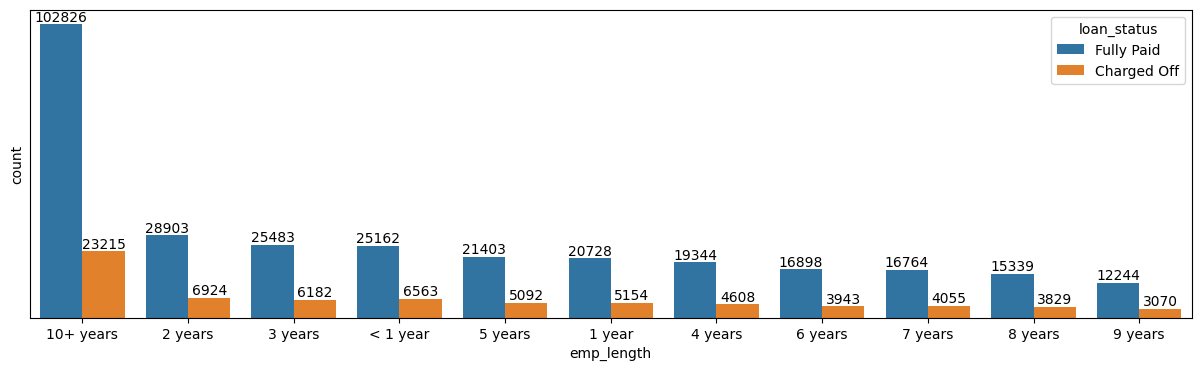

In [46]:
emp_len_loan_status = df[['emp_length', 'loan_status']].value_counts().reset_index() 
# display(emp_len_loan_status)
plt.figure(figsize=(15,4)) 
ax = sns.barplot(x='emp_length', y='count', hue='loan_status', data = emp_len_loan_status) 
for container in ax.containers:
   ax.bar_label(container, label_type='edge', fmt='%d') 
plt.yticks([])
plt.show()

**Observations:** 
* Dominance of Long-Term Employees (10+ Years):

Employees with 10+ years of experience have the highest loan count by a significant margin for both Fully Paid and Charged Off statuses.
This group is highly represented in this plot, indicating a preference for lending to experienced employees.

* Lower Default Rates for 10+ Years Group:

Although the 10+ years group has the highest number of Charged Off loans, the proportion of defaults compared to total loans is relatively small, suggesting that experienced employees are more reliable borrowers.

* Steady Loan Counts for Mid-Range Experience (2-6 Years):

Loan counts for employees with 2 to 6 years of experience are fairly consistent, with Fully Paid loans dominating this range.
Default rates in this range are moderate but still higher than the 10+ years group.

* Higher Default Proportions for Less Experienced Groups (< 1 Year, 1 Year):

Employees with <1 year and 1 year of experience show a higher proportion of Charged Off loans relative to their total loan counts.
This indicates that less experienced employees are riskier borrowers.

* Declining Loan Counts for Longer Tenures Beyond 6 Years:

After the 6 years mark, the total loan count gradually declines, with fewer employees taking loans as tenure increases (except for the 10+ years group).
This may reflect fewer employees in these tenure brackets or reduced loan demand.


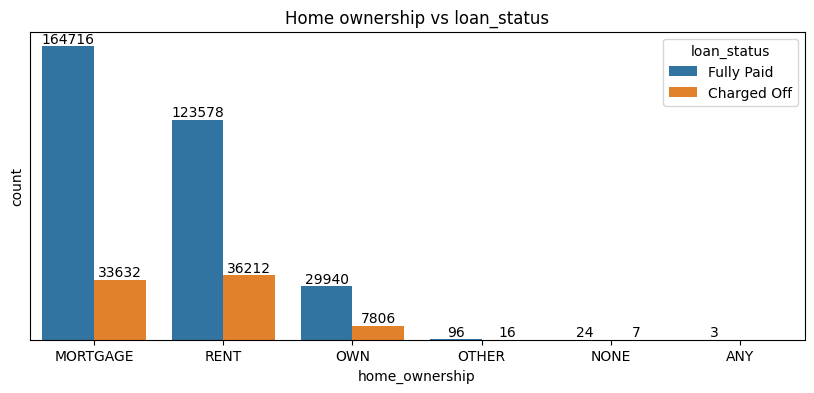

In [47]:
homeos_loan_status_df = df[['home_ownership', 'loan_status']].value_counts().reset_index() 
plt.figure(figsize=(10,4))
ax = sns.barplot(x='home_ownership', y='count', hue='loan_status', data = homeos_loan_status_df)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%d') 
plt.title('Home ownership vs loan_status')
plt.yticks([])
plt.show()

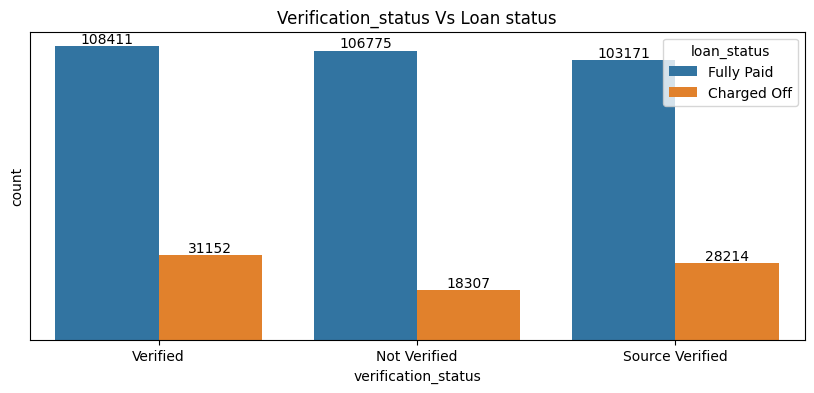

In [48]:
vs_ls_df = df[['verification_status', 'loan_status']].value_counts().reset_index() 
plt.figure(figsize=(10,4))
ax = sns.barplot(x='verification_status', y='count', hue='loan_status', data = vs_ls_df)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%d')
plt.title('Verification_status Vs Loan status')
plt.yticks([])
plt.show()

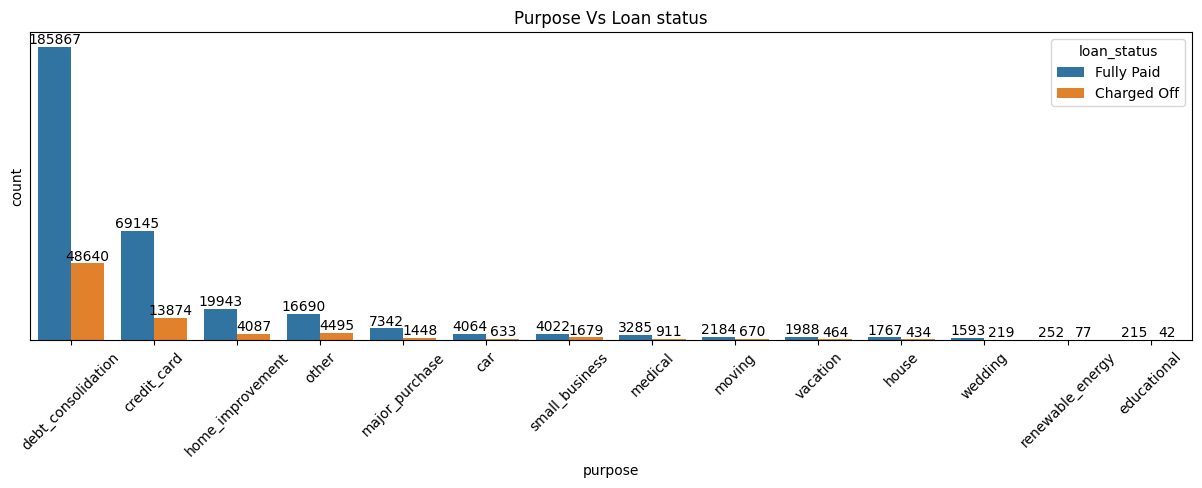

In [49]:
p_ls_df = df[['purpose', 'loan_status']].value_counts().reset_index() 
plt.figure(figsize=(15,4))
ax = sns.barplot(x='purpose', y='count', hue='loan_status', data = p_ls_df)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%d')
plt.title('Purpose Vs Loan status')
plt.xticks(rotation = 45)
plt.yticks([])
plt.show()

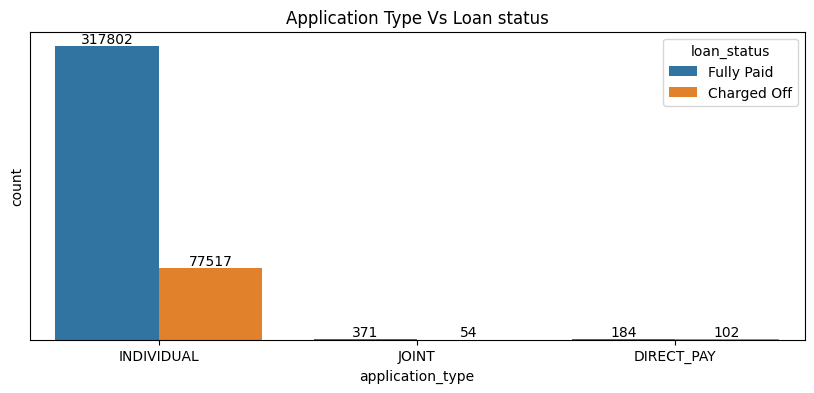

In [50]:
at_ls_df = df[['application_type', 'loan_status']].value_counts().reset_index() 
plt.figure(figsize=(10,4))
ax = sns.barplot(x='application_type', y='count', hue='loan_status', data = at_ls_df)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%d')
plt.title('Application Type Vs Loan status')
#plt.xticks(rotation = 45)
plt.yticks([])
plt.show()

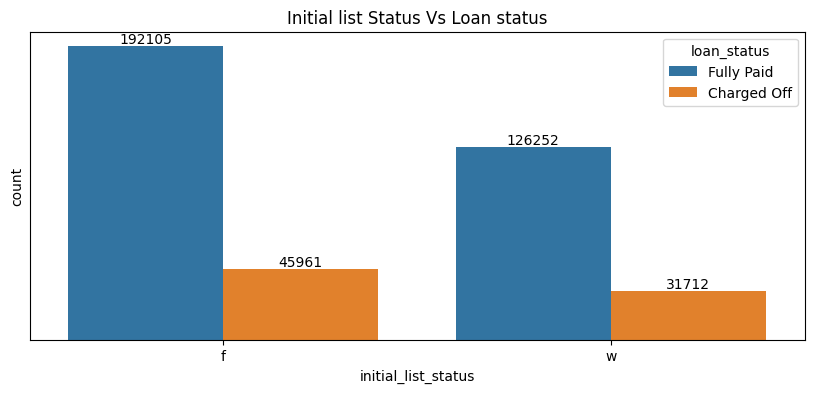

In [51]:
ils_ls_df = df[['initial_list_status', 'loan_status']].value_counts().reset_index() 
plt.figure(figsize=(10,4))
ax = sns.barplot(x='initial_list_status', y='count', hue='loan_status', data = ils_ls_df)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%d')
plt.title('Initial list Status Vs Loan status')
plt.yticks([])
plt.show()

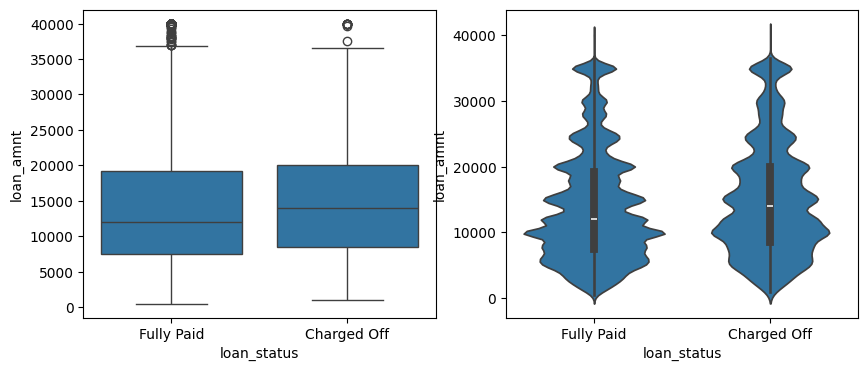

In [52]:
plt.figure(figsize=(10,4))
plt.subplot(121) 
sns.boxplot(x='loan_status', y='loan_amnt', data=df) 
plt.subplot(122) 
sns.violinplot(x='loan_status', y='loan_amnt', data=df) 
plt.show()

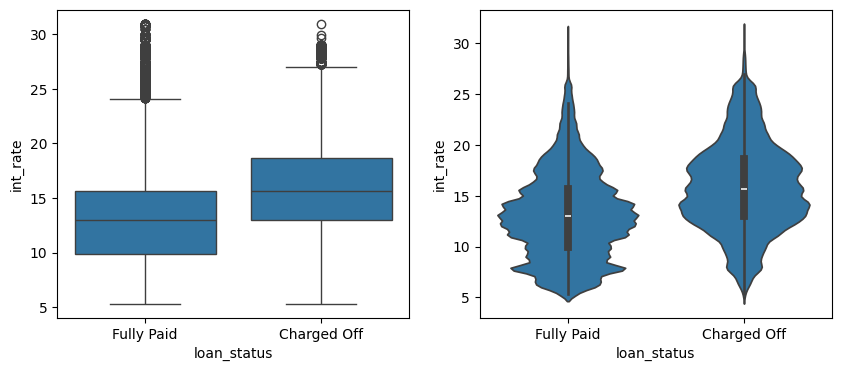

In [53]:
plt.figure(figsize=(10,4))
plt.subplot(121) 
sns.boxplot(x='loan_status', y='int_rate', data=df) 
plt.subplot(122) 
sns.violinplot(x='loan_status', y='int_rate', data=df) 
plt.show()

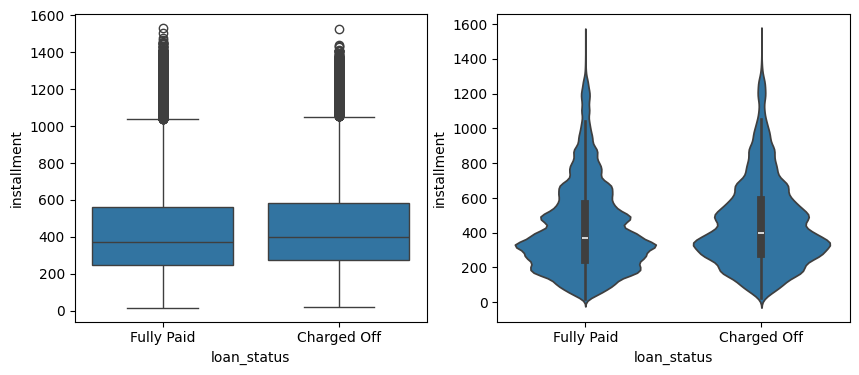

In [54]:
plt.figure(figsize=(10,4))
plt.subplot(121) 
sns.boxplot(x='loan_status', y='installment', data=df) 
plt.subplot(122) 
sns.violinplot(x='loan_status', y='installment', data=df) 
plt.show()

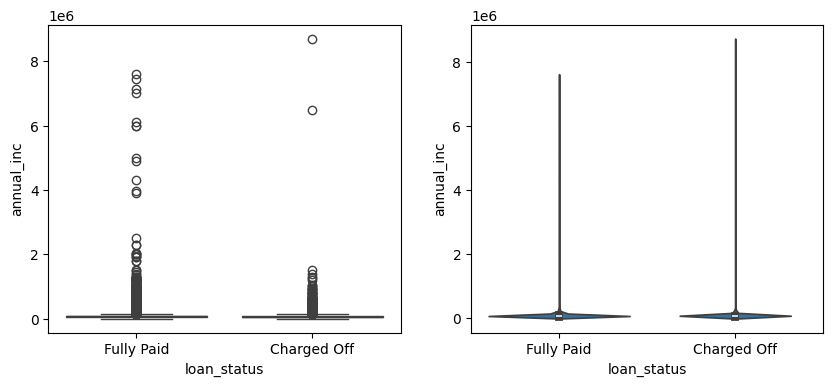

In [55]:
plt.figure(figsize=(10,4))
plt.subplot(121) 
sns.boxplot(x='loan_status', y='annual_inc', data=df) 
plt.subplot(122) 
sns.violinplot(x='loan_status', y='annual_inc', data=df) 
plt.show()

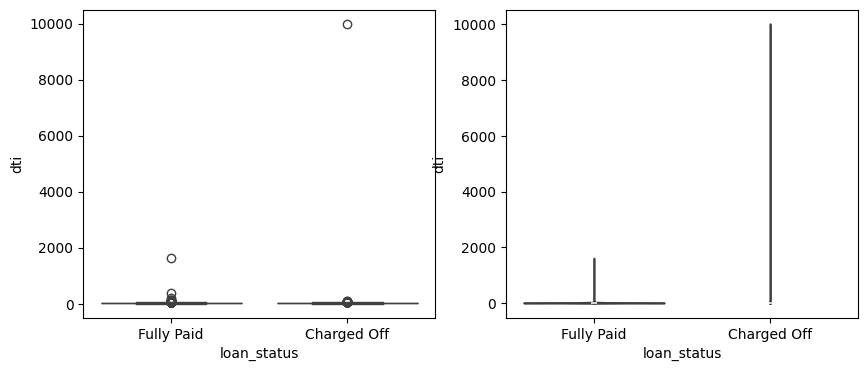

In [56]:
plt.figure(figsize=(10,4))
plt.subplot(121) 
sns.boxplot(x='loan_status', y='dti', data=df) 
plt.subplot(122) 
sns.violinplot(x='loan_status', y='dti', data=df) 
plt.show()

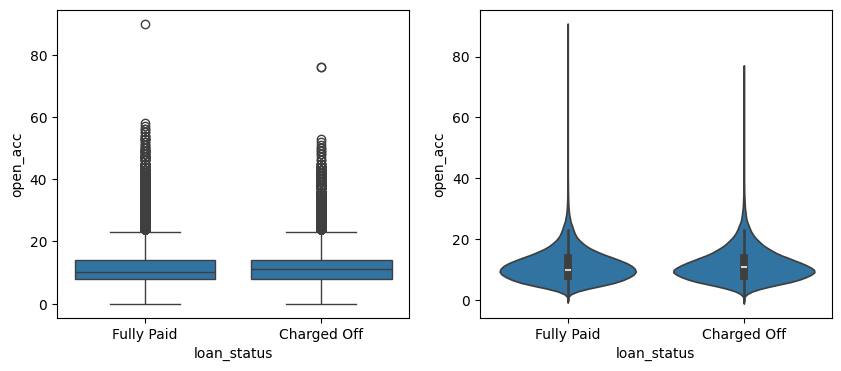

In [57]:
plt.figure(figsize=(10,4))
plt.subplot(121) 
sns.boxplot(x='loan_status', y='open_acc', data=df) 
plt.subplot(122) 
sns.violinplot(x='loan_status', y='open_acc', data=df) 
plt.show()

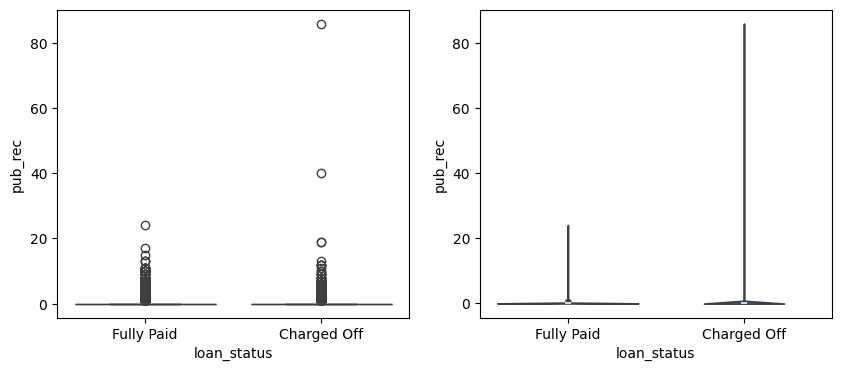

In [58]:
plt.figure(figsize=(10,4))
plt.subplot(121) 
sns.boxplot(x='loan_status', y='pub_rec', data=df) 
plt.subplot(122) 
sns.violinplot(x='loan_status', y='pub_rec', data=df) 
plt.show()

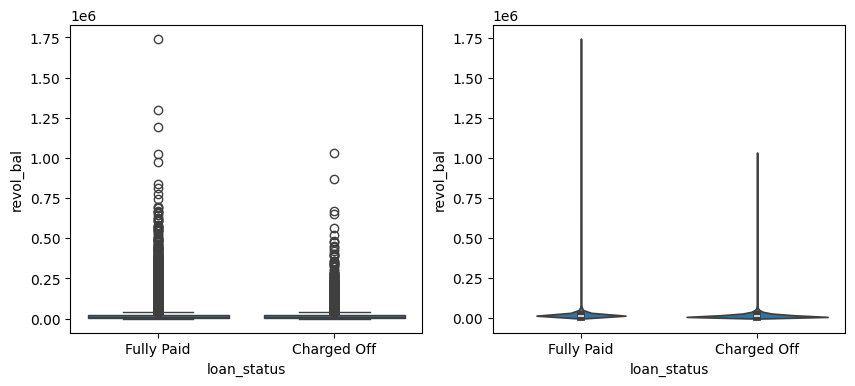

In [59]:
plt.figure(figsize=(10,4))
plt.subplot(121) 
sns.boxplot(x='loan_status', y='revol_bal', data=df) 
plt.subplot(122) 
sns.violinplot(x='loan_status', y='revol_bal', data=df) 
plt.show()

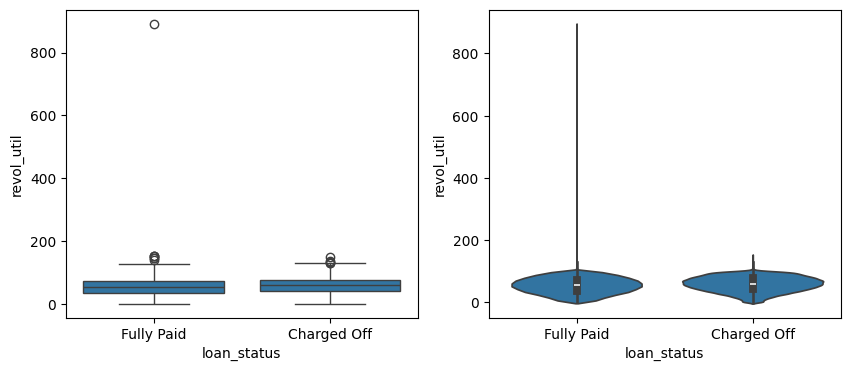

In [60]:
plt.figure(figsize=(10,4))
plt.subplot(121) 
sns.boxplot(x='loan_status', y='revol_util', data=df) 
plt.subplot(122) 
sns.violinplot(x='loan_status', y='revol_util', data=df) 
plt.show()

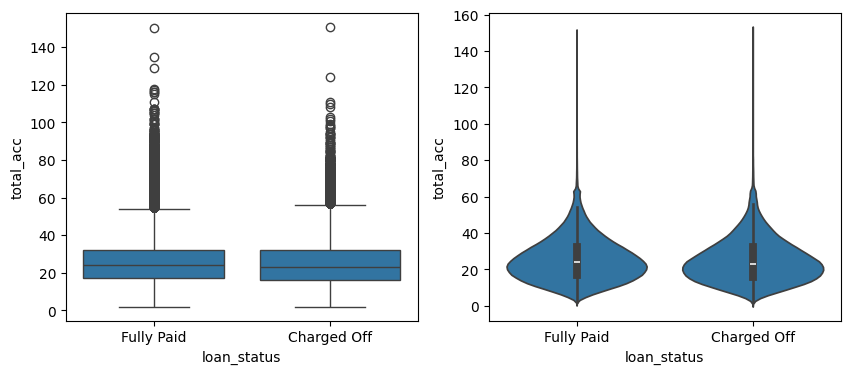

In [61]:
plt.figure(figsize=(10,4))
plt.subplot(121) 
sns.boxplot(x='loan_status', y='total_acc', data=df) 
plt.subplot(122) 
sns.violinplot(x='loan_status', y='total_acc', data=df) 
plt.show()

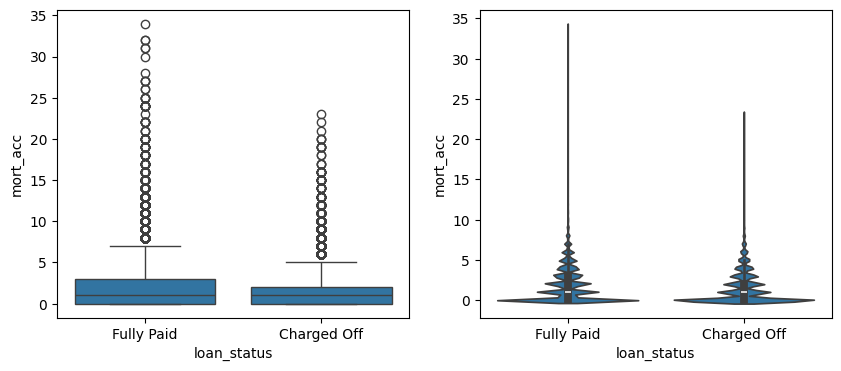

In [62]:
plt.figure(figsize=(10,4))
plt.subplot(121) 
sns.boxplot(x='loan_status', y='mort_acc', data=df) 
plt.subplot(122) 
sns.violinplot(x='loan_status', y='mort_acc', data=df) 
plt.show()

**Observation:** 
* From the plot, there is a slight difference in the spread of mort_acc values between "Fully Paid" and "Charged Off," with "Fully Paid" showing a wider distribution at higher values, the overall pattern is quite similar.
* Also, there is more skewness in data as outliers are present which required to be handled.

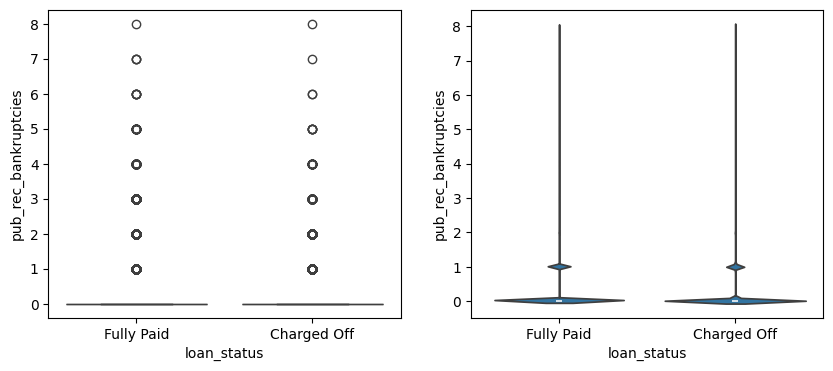

In [63]:
plt.figure(figsize=(10,4))
plt.subplot(121) 
sns.boxplot(x='loan_status', y='pub_rec_bankruptcies', data=df) 
plt.subplot(122) 
sns.violinplot(x='loan_status', y='pub_rec_bankruptcies', data=df) 
plt.show()

**Observation:** 
* From the above plot it is very evidient that there no such noticeable difference in pub_rec_bankruptcies between "Fully Paid" and "Charged Off," which might imply limited predictive power of this feature for distinguishing loan status.
* Also, there is more skewness in data as outliers are present which required to be handled..

# Multivariate analysis:

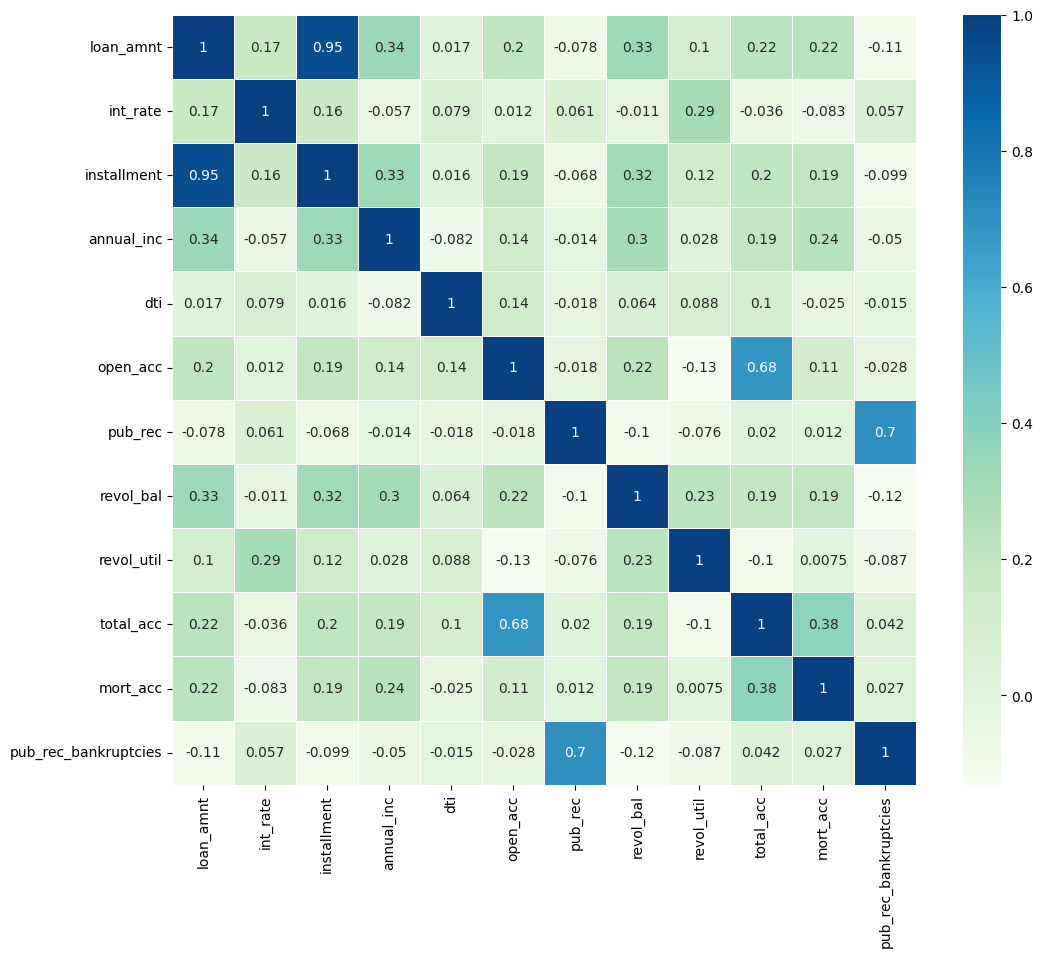

In [64]:
plt.figure(figsize=(12,10)) 
plt.style.use('default')
sns.heatmap(data=df[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc','mort_acc','pub_rec_bankruptcies']].corr(),annot=True, linewidth=.5,cmap='GnBu') 
plt.show()

In [65]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [66]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [67]:
# df.drop(columns='installment', inplace=True) 
# df.head()

## Null Values Treatment 
- **Drop Rows/Columns**
- **Impute Values**

In [68]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >1.1:
        return 1
    else:
        return number

def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >1.1:
        return 1
    else:
        return number

In [69]:
# df['pub_rec'] = df['pub_rec'].apply(pub_rec)
df['mort_acc'] = df['mort_acc'].apply(mort_acc)
# df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(pub_rec)

title_mode = df['emp_title'].mode()[0]
df['emp_title'] = df['emp_title'].fillna(title_mode)
len_mode = df['emp_length'].mode()[0]
df['emp_length'] = df['emp_length'].fillna(len_mode)
# df['emp_title'] = df['emp_title'].fillna('UnKnown Title') 
# df['emp_length'] = df['emp_length'].fillna('UnKnown Length')

from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='mean')
df['revol_util'] = si.fit_transform(df[['revol_util']])
#df['mort_acc'] = si.fit_transform(df[['mort_acc']])

In [70]:
df = df.dropna(subset=['title', 'pub_rec_bankruptcies' , 'revol_util']) 
print(df.shape)

(393739, 27)


In [71]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                       0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37250
pub_rec_bankruptcies        0
address                     0
dtype: int64

In [72]:
# from sklearn.impute import SimpleImputer

# si = SimpleImputer(strategy='median') 
# imputed_data = imputer.fit_transform(df[['mort_acc']]) 
# df.loc[:,['mort_acc']] = df.astype('int')

# df['revol_util'] = si.fit_transform(df[['revol_util']])
# df.loc[:,['revol_util']] = df.astype('int')

# imputer = SimpleImputer(strategy='mean')  # Choose 'mean', 'median', or 'most_frequent'
# df['pub_rec_bankruptcies'] = imputer.fit_transform(df[['pub_rec_bankruptcies']])

# from sklearn.impute import SimpleImputer
# si = SimpleImputer(strategy='mean')
# df['revol_util'] = si.fit_transform(df[['revol_util']])
df['mort_acc'] = si.fit_transform(df[['mort_acc']])

In [73]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,1.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [74]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [75]:
df['mort_acc'].unique()

array([0.        , 1.        , 0.60974672])

In [76]:
#df['pub_rec'] = [1 if i > 1 else 0 for i in df['pub_rec']]
#df['mort_acc'] = [1 if i > 1 else 0 for i in df['mort_acc']]
#df['pub_rec_bankruptcies'] = [1 if i > 1 else 0 for i in df['pub_rec_bankruptcies']]

In [77]:
df['mort_acc'].unique()

array([0.        , 1.        , 0.60974672])

## Duplicates Data Handling 
* Find Duplicate Records Remove Duplicates


In [78]:
df.duplicated().sum()

0

* Observation: From above Basic analysis on the data, No duplicate records found.

## Outliers Treatment: 
* Detect Outliers
* Handle Outliers
* From the above uni-variate and bi-variate analysis we can observe that all the numerical features has soo many outliers.

In [79]:
num_col = df.select_dtypes(include = 'number').columns
num_col

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

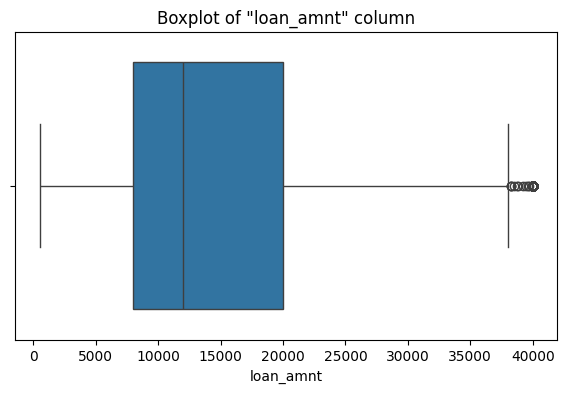

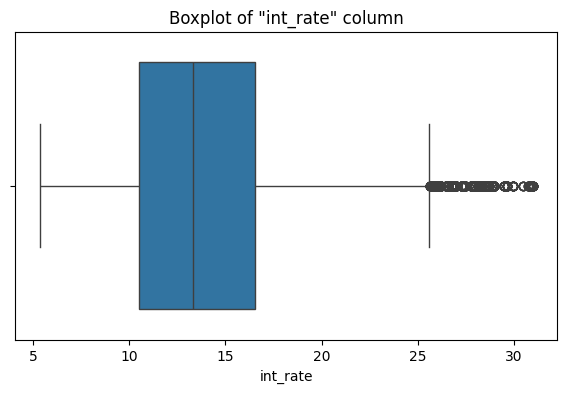

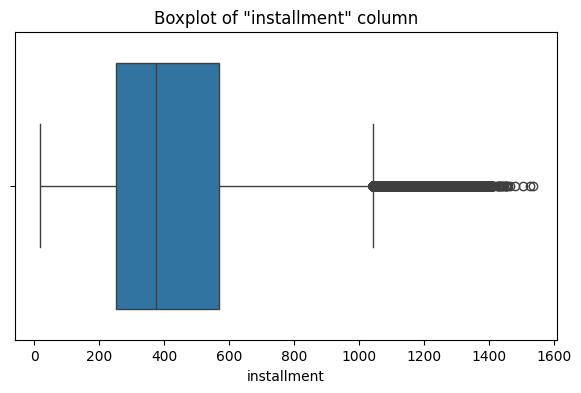

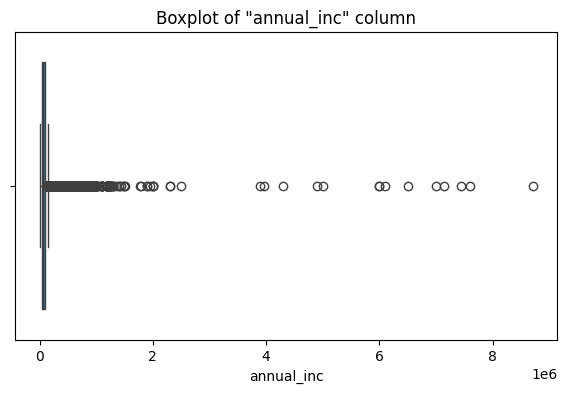

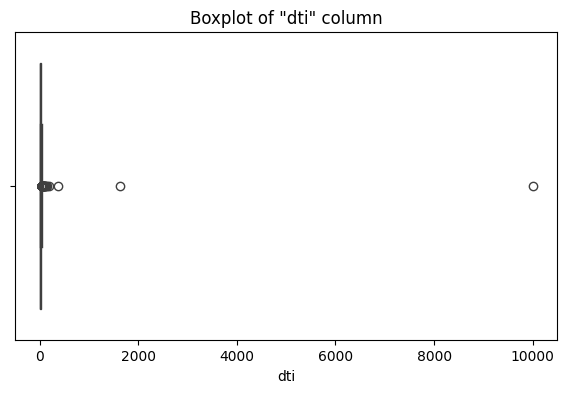

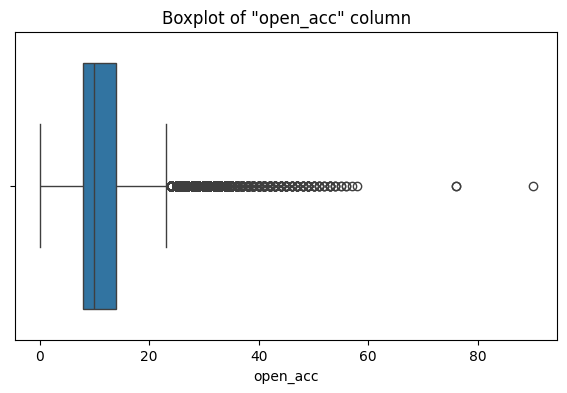

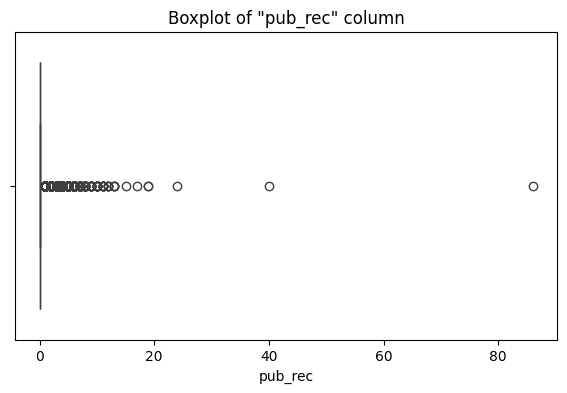

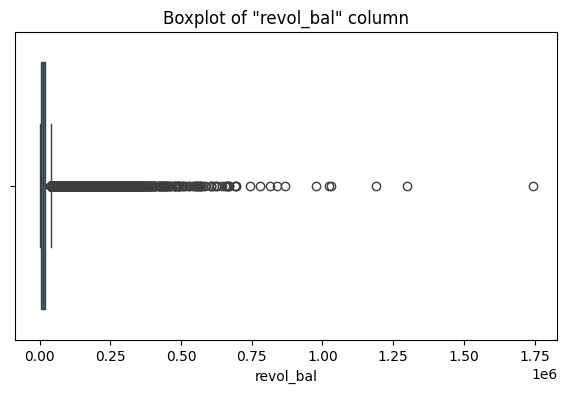

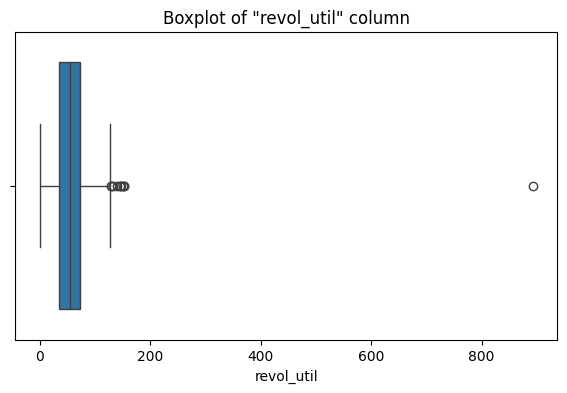

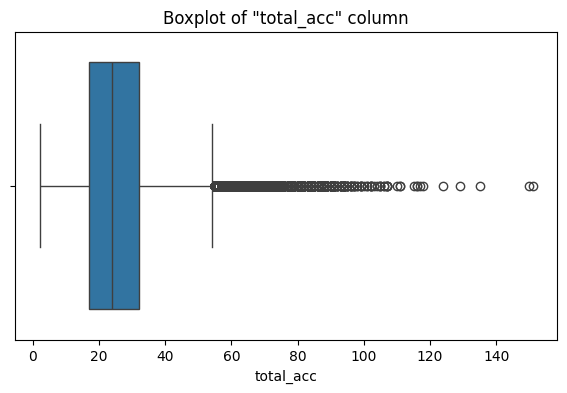

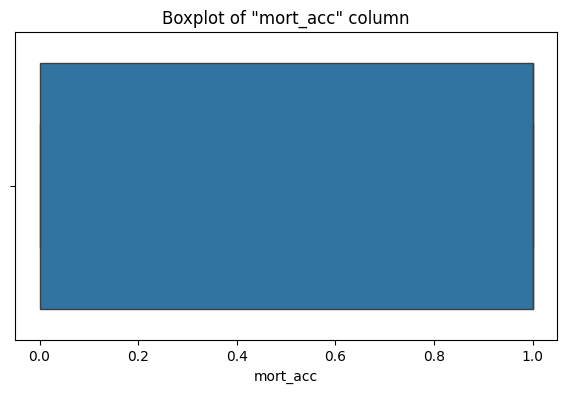

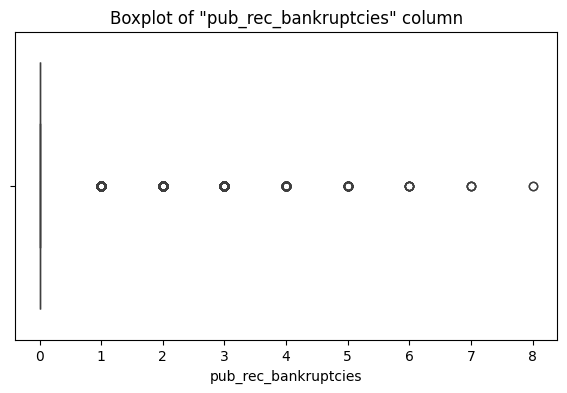

In [80]:
def box_plot(col):
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of "{col}" column')
    plt.show()

for col in num_col:
    box_plot(col)

## Date and Time Features Handling: 
* Convert Date Columns
* Extract Date Features Calculate Time Deltas

In [81]:
df['issue_d'] = pd.to_datetime(df['issue_d']) 
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [82]:
df.dtypes

loan_amnt                      float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
title                           object
dti                            float64
earliest_cr_line        datetime64[ns]
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
total_acc                      float64
initial_list_status             object
application_type                object
mort_acc                       float64
pub_rec_bankruptcies     

In [83]:
#df.issue_d.str.split('-',expand= True)
#Split issue_date into month and year
# df[['issue_month', 'issue_year']] = df['issue_d'].str.split('-', expand=True)
# df.drop(['issue_d'], axis=1, inplace=True)
df['issue_year']= pd.to_datetime(df['issue_d']).dt.year 
df['issue_month'] = pd.to_datetime(df['issue_d']).dt.strftime('%b')
df['issue_month_num'] = pd.to_datetime(df['issue_d']).dt.month

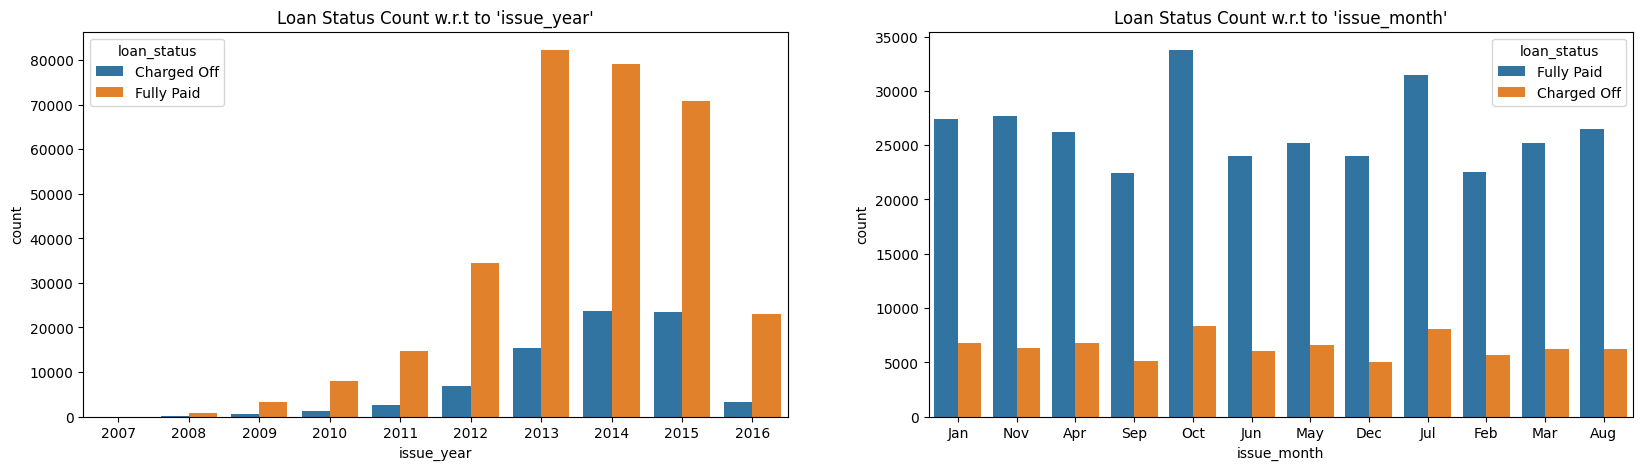

In [84]:
plt.figure(figsize=(20,5))
plt.subplot(121) 
plt.title("Loan Status Count w.r.t to 'issue_year'") 
sns.countplot(x='issue_year', data=df, hue='loan_status') 

plt.subplot(122) 
plt.title("Loan Status Count w.r.t to 'issue_month'") 
sns.countplot(x='issue_month', data=df, hue='loan_status') 

plt.show()

* Observation : Most of the loans are issued during 2013 to 2015 and in Oct and Jul months.

In [85]:
# df['earliest_cr_line'].str.split('-', expand=True)
# #Split er_cr_line date into month and year
# df[['er_cr_line_m', 'er_cr_line_y']] = df['earliest_cr_line'].str.split('-', expand=True)
# df.drop(['earliest_cr_line'], axis=1, inplace=True)
df['earliest_cr_line_year'] = pd.to_datetime(df['earliest_cr_line']).dt.year 
df['earliest_cr_line_month'] = pd.to_datetime(df['earliest_cr_line']).dt.strftime('%b')
df['earliest_cr_line_month_num'] = pd.to_datetime(df['earliest_cr_line']).dt.month

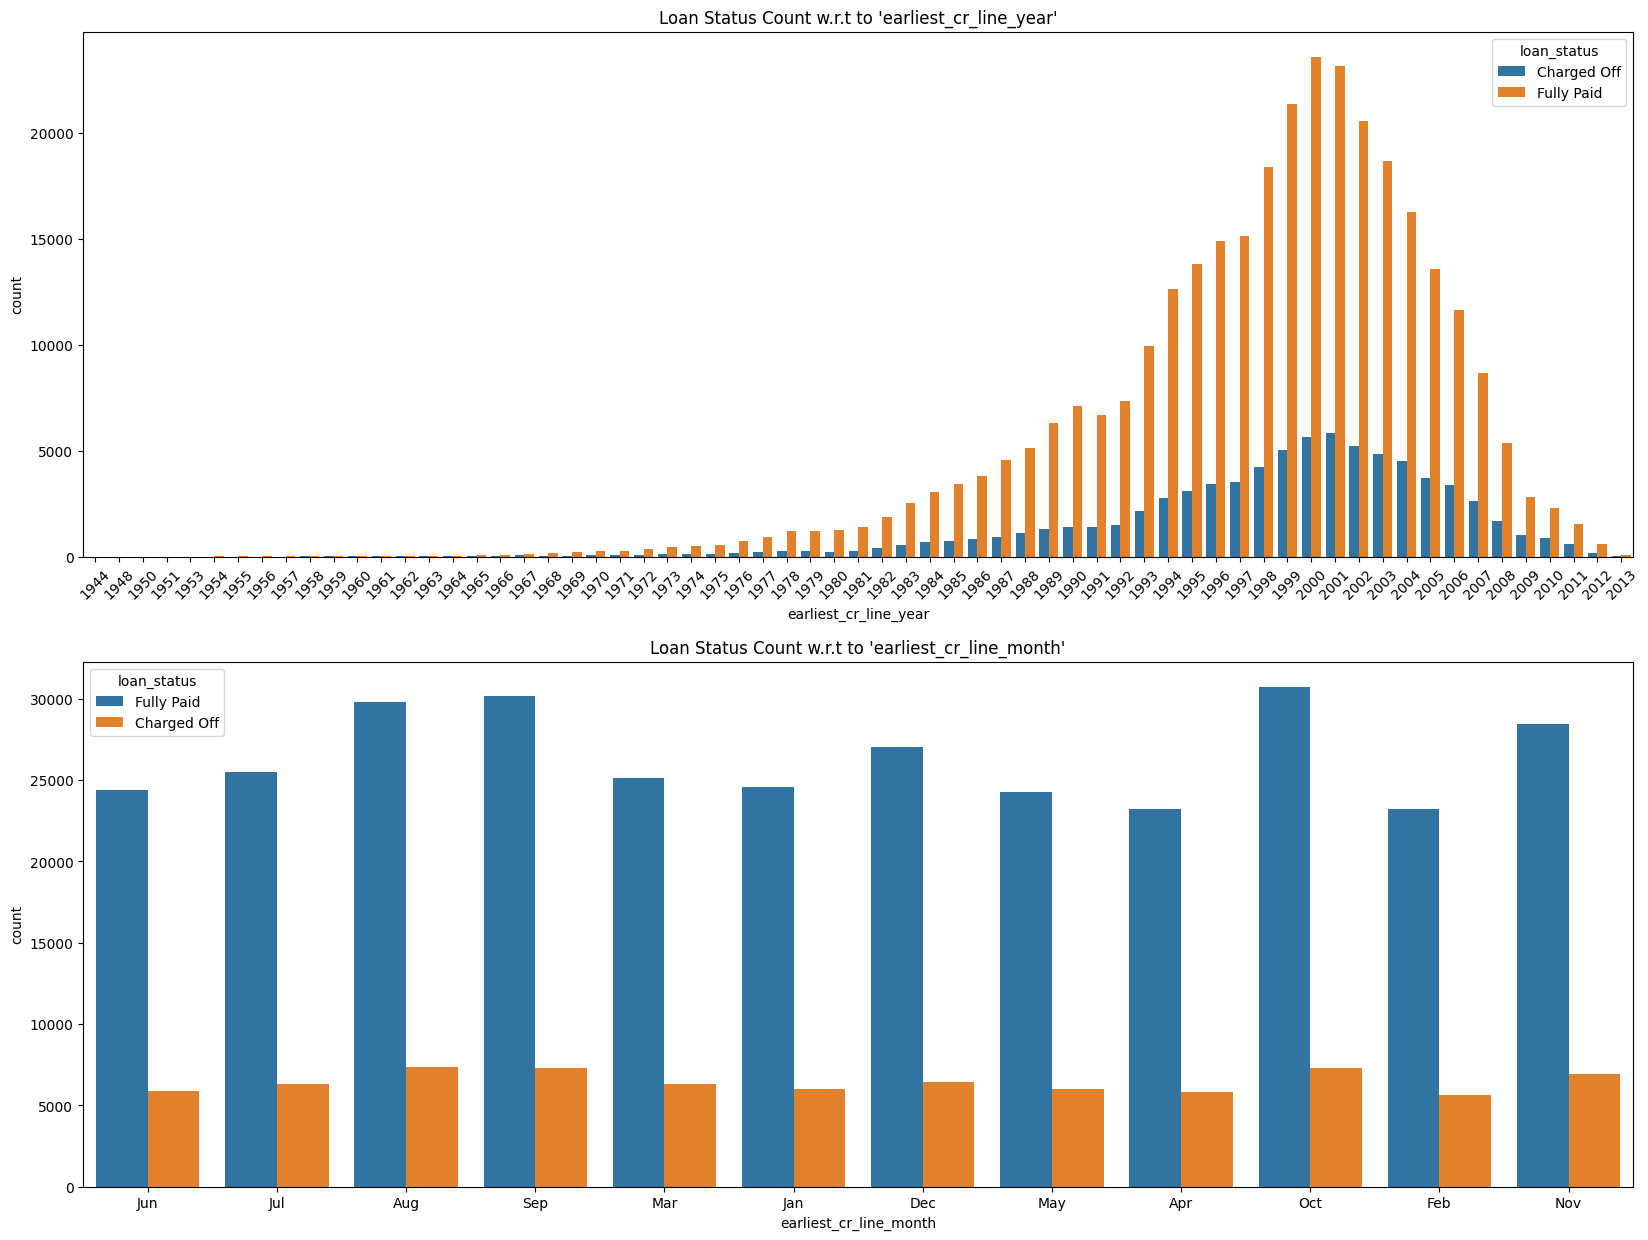

In [86]:
plt.figure(figsize=(20,15))
plt.subplot(211) 
plt.title("Loan Status Count w.r.t to 'earliest_cr_line_year'")
sns.countplot(x='earliest_cr_line_year', data=df, hue='loan_status') 
plt.xticks(rotation=45)

plt.subplot(212) 
plt.title("Loan Status Count w.r.t to 'earliest_cr_line_month'") 
sns.countplot(x='earliest_cr_line_month', data=df, hue='loan_status') 

plt.show()

## Feature engineering & Inconsistent Data Handling:
* like, Standardize Categorical Variables (e.g., "male" and "Male" should be standardized to one format).
* Handle Typos and Inconsistencies (e.g., "NY" vs. "New York").

### Handling 'address' Feature values Inconsistency

In [87]:
df.address[1]

'1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113'

In [88]:
#Split address into State and Zip code
import re
df[['state','zipcode']] = df['address'].str.extract(r'([A-Z]{2}) (\d{5})')
df.drop(['address'], axis=1, inplace=True)

### Handling 'emp_length' Feature values Inconsistency

In [89]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],
      dtype=object)

In [90]:
df['emp_length'].str.split(" ").str[-2]

0         10+
1           4
2           1
3           6
4           9
         ... 
396025      2
396026      5
396027    10+
396028    10+
396029    10+
Name: emp_length, Length: 393739, dtype: object

In [91]:
# Extraction and Conversion of data from categorical columns:
df['emp_length_yrs'] = df['emp_length'].str.split(" ").str[-2]
df['emp_length_yrs'] = df['emp_length_yrs'].replace('10+', '10')
df['emp_length_yrs'] = pd.to_numeric(df['emp_length_yrs'])
#new_df = new_df.drop(columns= 'emp_length')

In [92]:
#df['emp_length_yrs'] = df['emp_length'].str.extract('(\d+)')
#df.drop(['emp_length'], axis=1, inplace=True)

### Handling 'title' Feature values Inconsistency

In [93]:
df.title.value_counts()

title
Debt consolidation         152467
Credit card refinancing     51487
Home improvement            15263
Other                       12930
Debt Consolidation          11593
                            ...  
gotta move                      1
creditcardrefi                  1
Debt/Home                       1
Peace Of Mind Loan              1
Toxic Debt Payoff               1
Name: count, Length: 48521, dtype: int64

In [94]:
df.loc[:,'title'] = df.loc[:,'title'].apply(lambda x:x.strip()) 
df.loc[:,'title'] = df.loc[:,'title'].apply(lambda x:x.lower())

In [95]:
df[['title', 'loan_status']].value_counts().reset_index().head(20)

,title,loan_status,count
0,debt consolidation,Fully Paid,131221
1,credit card refinancing,Fully Paid,41842
2,debt consolidation,Charged Off,37782
3,home improvement,Fully Paid,14024
4,credit card refinancing,Charged Off,9960
5,other,Fully Paid,9951
6,consolidation,Fully Paid,4929
7,major purchase,Fully Paid,3996
8,home improvement,Charged Off,3234
9,debt consolidation loan,Fully Paid,3055


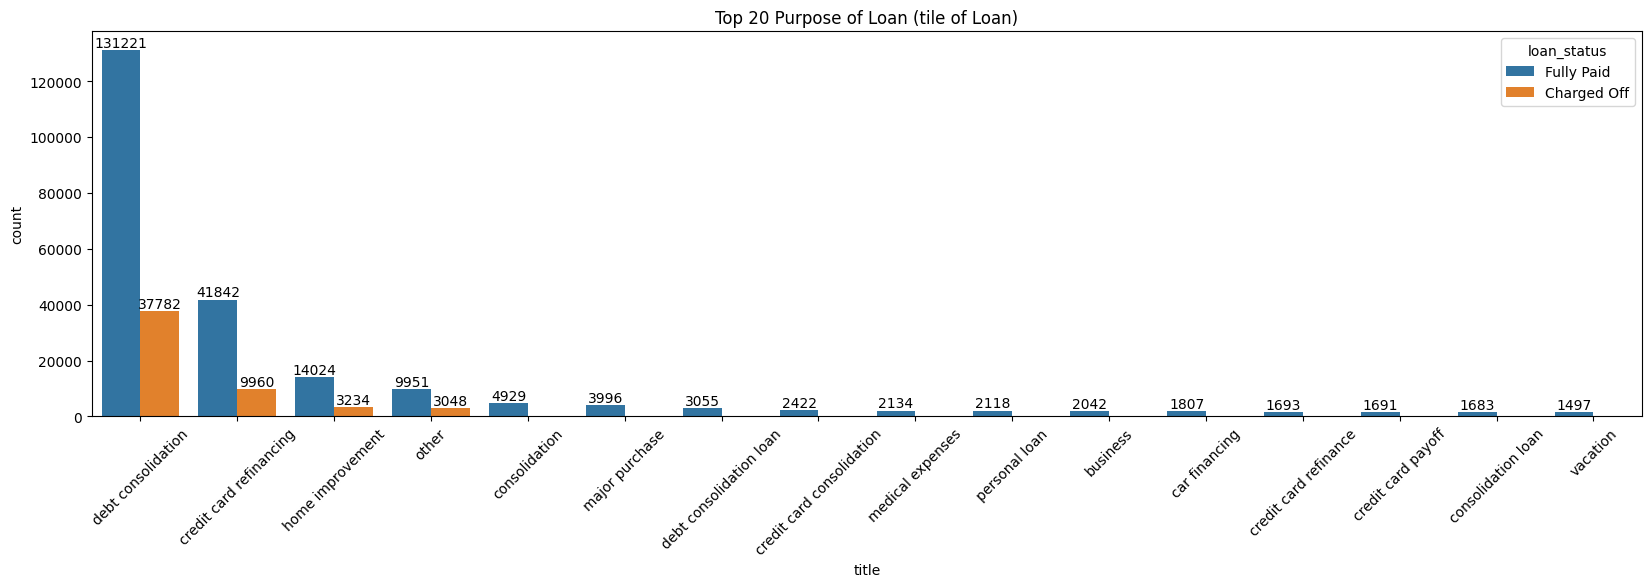

In [96]:
plt.figure(figsize=(20,5)) 
ax = sns.barplot(x='title', y='count', hue='loan_status', data=df[['title', 'loan_status']].value_counts().reset_index().head(20))
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%d')
plt.title('Top 20 Purpose of Loan (tile of Loan)') 
plt.xticks(rotation=45) 
plt.show()

* Observation : Most of the loans are taken for the purpose of debt consolidation.

In [97]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_year,issue_month,issue_month_num,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_month_num,state,zipcode,emp_length_yrs
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,vacation,26.24,1990-06-01,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,2015,Jan,1,1990,Jun,6,OK,22690,10
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,debt consolidation,22.05,2004-07-01,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,1.0,0.0,2015,Jan,1,2004,Jul,7,SD,05113,4
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,credit card refinancing,12.79,2007-08-01,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,2015,Jan,1,2007,Aug,8,WV,05113,1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,credit card refinancing,2.60,2006-09-01,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,2014,Nov,11,2006,Sep,9,MA,00813,6
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,credit card refinance,33.95,1999-03-01,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,2013,Apr,4,1999,Mar,3,VA,11650,9


### Handling 'term' Feature values Inconsistency

In [98]:
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [99]:
df['term'] = df['term'].str.split().str[0].astype('object')

### Handling 'emp_title' Feature values Inconsistency

In [100]:
df.emp_title.value_counts()

emp_title
Teacher                 27053
Manager                  4233
RN                       1842
Registered Nurse         1842
Supervisor               1813
                        ...  
OMIV Supervisor             1
SVP, Technology             1
sikorsky                    1
Postman                     1
Gracon Services, Inc        1
Name: count, Length: 172341, dtype: int64

In [101]:
df.emp_title.apply(lambda x:x.strip()).value_counts()

emp_title
Teacher                                27169
Manager                                 4395
Supervisor                              1978
Registered Nurse                        1901
RN                                      1895
                                       ...  
Tec-Masters, Inc                           1
customer technical support rep             1
Quality Professionals International        1
marmot electric                            1
Gracon Services, Inc                       1
Name: count, Length: 167581, dtype: int64

In [102]:
df.loc[:,'emp_title'] = df.loc[:,'emp_title'].apply(lambda x:x.strip()) 
df.loc[:,'emp_title'] = df.loc[:,'emp_title'].apply(lambda x:x.lower())

In [103]:
df[['emp_title', 'loan_status']].value_counts().reset_index().head(20)

,emp_title,loan_status,count
0,teacher,Fully Paid,21229
1,teacher,Charged Off,6991
2,manager,Fully Paid,4446
3,registered nurse,Fully Paid,2165
4,supervisor,Fully Paid,2102
5,sales,Fully Paid,1853
6,rn,Fully Paid,1682
7,driver,Fully Paid,1648
8,project manager,Fully Paid,1512
9,owner,Fully Paid,1484


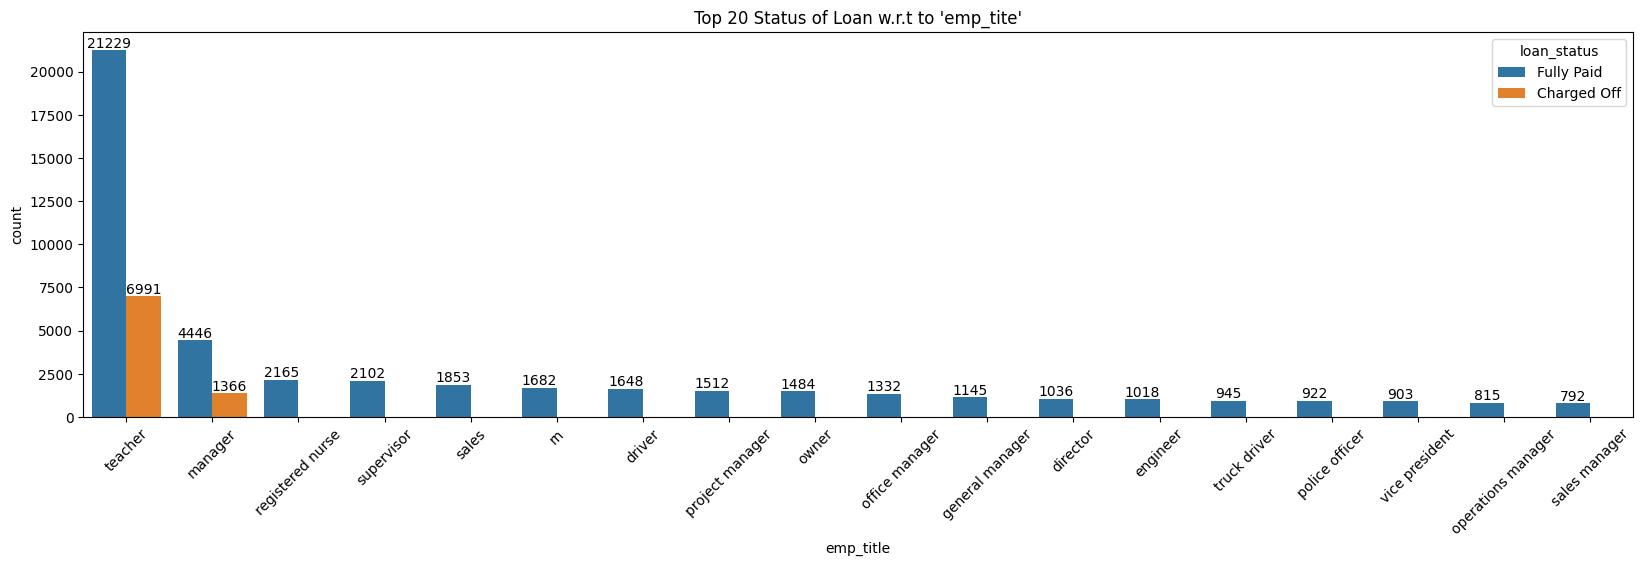

In [104]:
plt.figure(figsize=(20,5)) 
ax = sns.barplot(x='emp_title', y='count', hue = 'loan_status' ,data = df[['emp_title', 'loan_status']].value_counts().reset_index().head(20)) 
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%d')
plt.title("Top 20 Status of Loan w.r.t to 'emp_tite'") 
plt.xticks(rotation=45) 
plt.show()

* Observation : Most of the loans are taken by managers and teachers.

## Outlier treatment:

In [105]:
#df['emp_length_yrs'] = df['emp_length_yrs'].astype(int)
df['emp_length_yrs'].isna().sum()

0

In [106]:
df.dtypes

loan_amnt                            float64
term                                  object
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_title                             object
emp_length                            object
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                           object
purpose                               object
title                                 object
dti                                  float64
earliest_cr_line              datetime64[ns]
open_acc                             float64
pub_rec                              float64
revol_bal                            float64
revol_util                           float64
total_acc                            float64
initial_li

In [107]:
df.select_dtypes(include=['number'])

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,issue_year,issue_month_num,earliest_cr_line_year,earliest_cr_line_month_num,emp_length_yrs
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.000000,0.0,2015,1,1990,6,10
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,1.000000,0.0,2015,1,2004,7,4
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.000000,0.0,2015,1,2007,8,1
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.000000,0.0,2014,11,2006,9,6
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.000000,0.0,2013,4,1999,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,23.0,0.000000,0.0,2015,10,2004,11,2
396026,21000.0,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,8.0,1.000000,0.0,2015,2,2006,2,5
396027,5000.0,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,23.0,0.000000,0.0,2013,10,1997,3,10
396028,21000.0,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,20.0,1.000000,0.0,2012,8,1990,11,10


In [108]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

# Step 1: Select numerical columns
num_co = df.select_dtypes(include=['number'])

# Step 2: Handle missing values
# num_col = num_col.fillna(num_col.median())

# # Step 3: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(num_co)

# Step 4: Apply Local Outlier Factor
lof_model = LocalOutlierFactor()
df['lof_anomaly_score'] = lof_model.fit_predict(num_co)

# Step 5: Analyze results
print(df.head())


   loan_amnt term  int_rate  installment grade sub_grade  \
0    10000.0   36     11.44       329.48     B        B4   
1     8000.0   36     11.99       265.68     B        B5   
2    15600.0   36     10.49       506.97     B        B3   
3     7200.0   36      6.49       220.65     A        A2   
4    24375.0   60     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  \
0                marketing  10+ years           RENT    117000.0   
1           credit analyst    4 years       MORTGAGE     65000.0   
2             statistician   < 1 year           RENT     43057.0   
3          client advocate    6 years           RENT     54000.0   
4  destiny management inc.    9 years       MORTGAGE     55000.0   

  verification_status    issue_d  loan_status             purpose  \
0        Not Verified 2015-01-01   Fully Paid            vacation   
1        Not Verified 2015-01-01   Fully Paid  debt_consolidation   
2     Source Verified 2

In [109]:
print(df['lof_anomaly_score'].value_counts())

lof_anomaly_score
 1    384699
-1      9040
Name: count, dtype: int64


The output of lof_anomaly_score indicates the following:

*  1 (Inliers): The value 1 represents data points that the LocalOutlierFactor (LOF) model considers normal (inliers).
  
Count: 384,891 rows are classified as normal.
* -1 (Outliers): The value -1 represents data points that the LOF model considers anomalies (outliers).
  
Count: 9,108 rows are classified as outliers.

In [110]:
df = df.loc[(df['lof_anomaly_score']==1)]

In [111]:
df.drop(columns = 'lof_anomaly_score', inplace= True)

In [112]:
df.shape

(384699, 35)

* Conclusion: all the outliers were removed.

## Final Sanity Checks 
* Recheck Missing Values
* Visualize Distributions
* Check for Data Leakage

In [113]:
df.shape

(384699, 35)

In [114]:
df.isna().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                         0
dti                           0
earliest_cr_line              0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
application_type              0
mort_acc                      0
pub_rec_bankruptcies          0
issue_year                    0
issue_month                   0
issue_month_num               0
earliest_cr_line_year         0
earliest_cr_line_month        0
earliest

In [115]:
df.select_dtypes(include = 'number').columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'issue_year', 'issue_month_num',
       'earliest_cr_line_year', 'earliest_cr_line_month_num',
       'emp_length_yrs'],
      dtype='object')

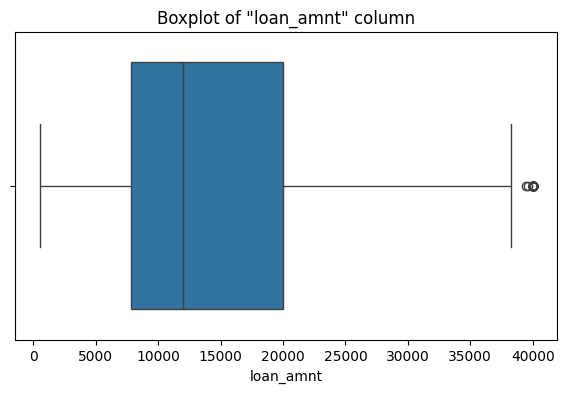

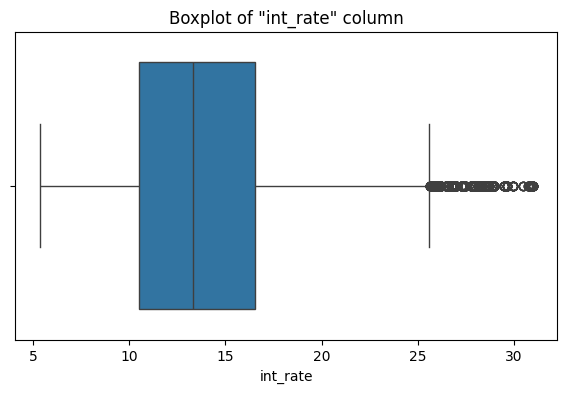

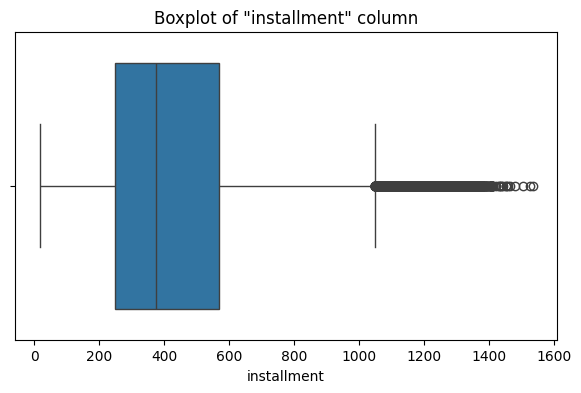

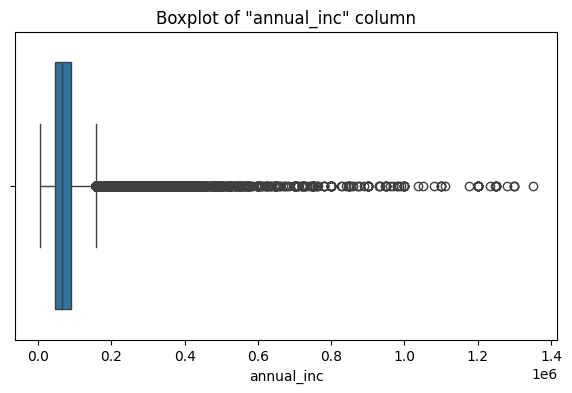

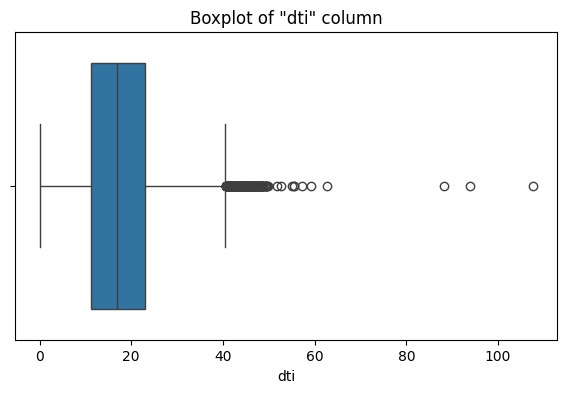

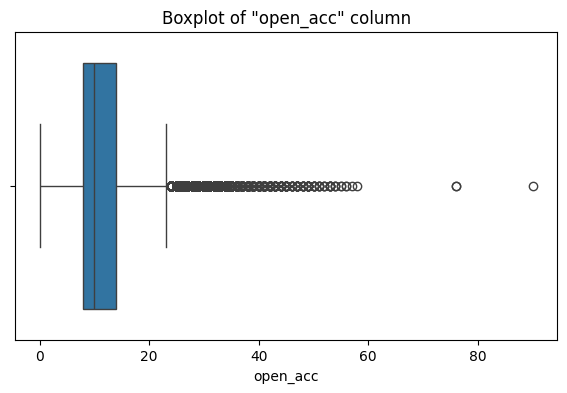

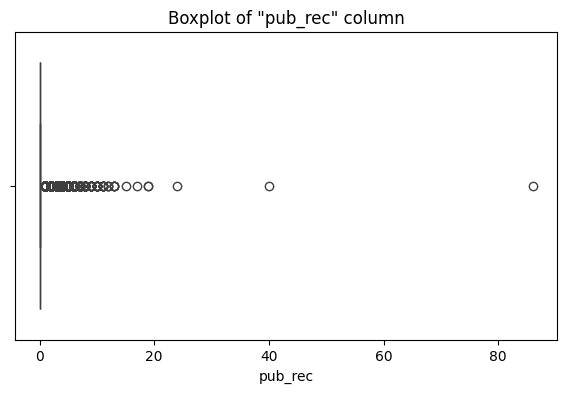

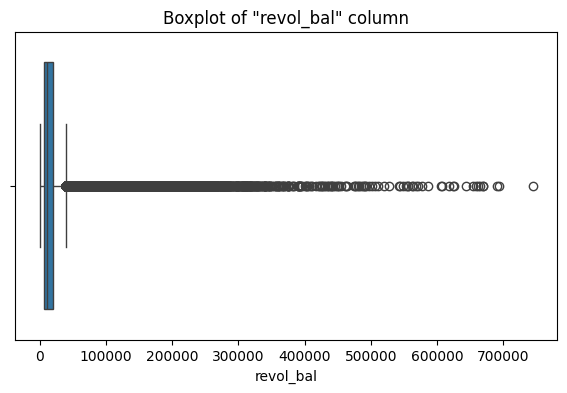

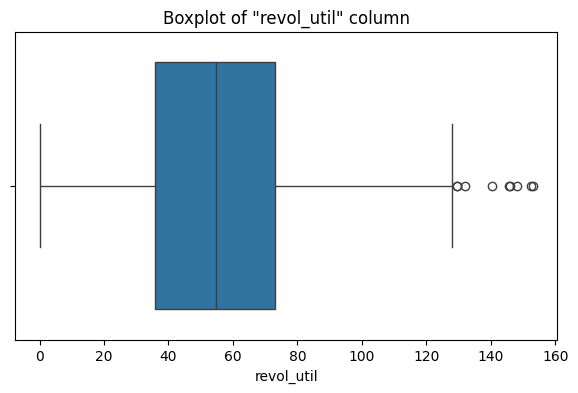

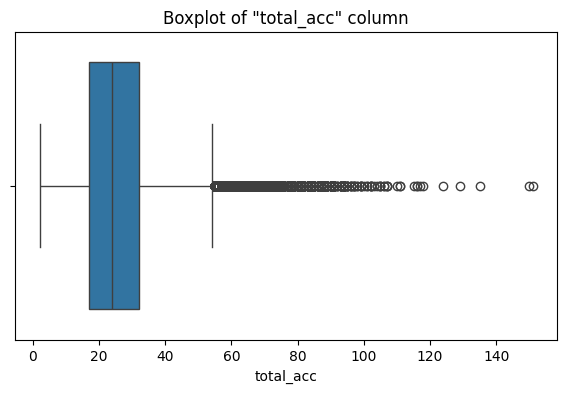

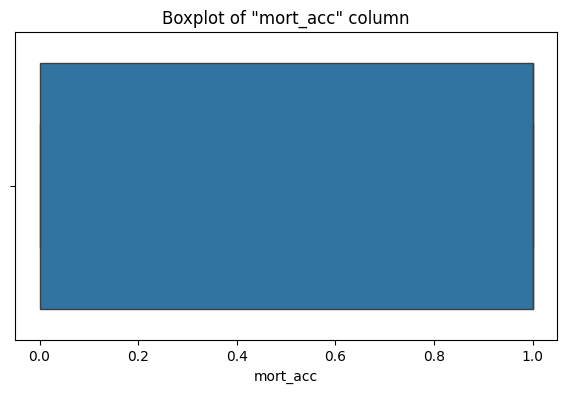

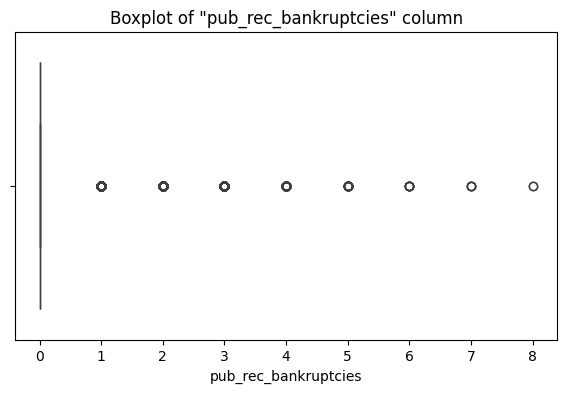

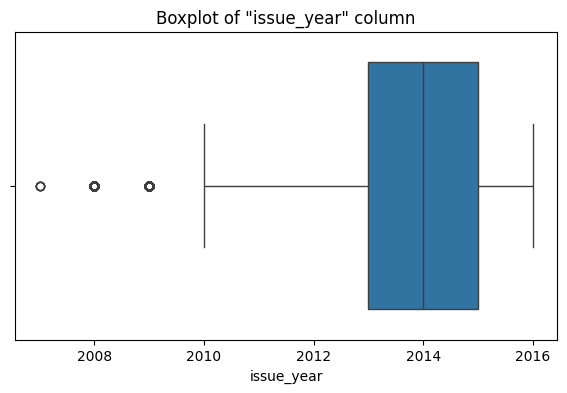

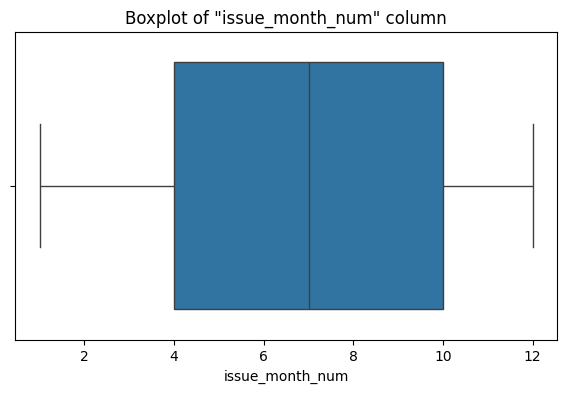

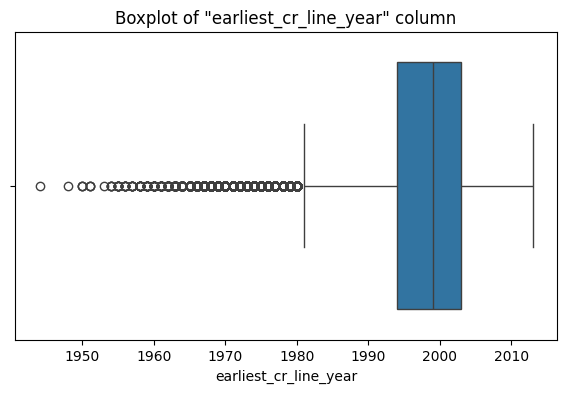

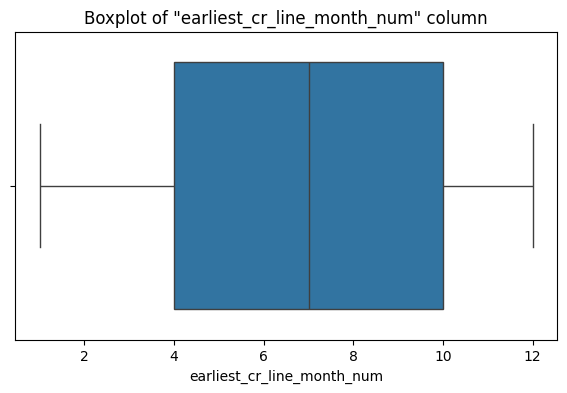

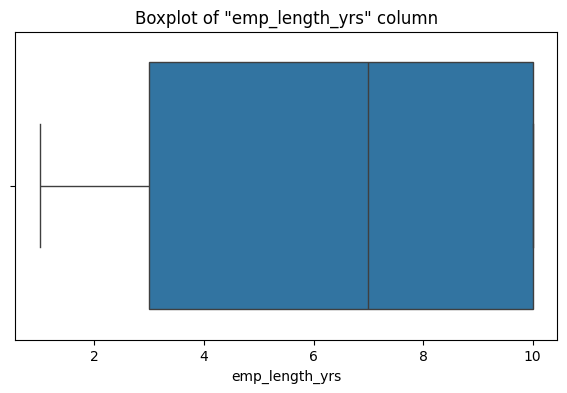

In [116]:
num_col = df.select_dtypes(include = 'number').columns
num_col

def box_plot(col):
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of "{col}" column')
    plt.show()

for col in num_col:
    box_plot(col)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384699 entries, 0 to 396029
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   384699 non-null  float64       
 1   term                        384699 non-null  object        
 2   int_rate                    384699 non-null  float64       
 3   installment                 384699 non-null  float64       
 4   grade                       384699 non-null  object        
 5   sub_grade                   384699 non-null  object        
 6   emp_title                   384699 non-null  object        
 7   emp_length                  384699 non-null  object        
 8   home_ownership              384699 non-null  object        
 9   annual_inc                  384699 non-null  float64       
 10  verification_status         384699 non-null  object        
 11  issue_d                     384699 non-null 

## Encoding catagorical columns

In [118]:
new_df = df.copy()

In [119]:
new_df['term'].unique()

array(['36', '60'], dtype=object)

In [120]:
#term_values = {'36 months': 36, ' 60 months':60}
new_df['term'] = new_df['term'].astype(int)

In [121]:
#df.info()
new_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_year,issue_month,issue_month_num,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_month_num,state,zipcode,emp_length_yrs
0,10000.0,36,11.44,329.48,B,B4,marketing,10+ years,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,vacation,26.24,1990-06-01,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,2015,Jan,1,1990,Jun,6,OK,22690,10
1,8000.0,36,11.99,265.68,B,B5,credit analyst,4 years,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,debt consolidation,22.05,2004-07-01,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,1.0,0.0,2015,Jan,1,2004,Jul,7,SD,05113,4
2,15600.0,36,10.49,506.97,B,B3,statistician,< 1 year,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,credit card refinancing,12.79,2007-08-01,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,2015,Jan,1,2007,Aug,8,WV,05113,1
3,7200.0,36,6.49,220.65,A,A2,client advocate,6 years,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,credit card refinancing,2.60,2006-09-01,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,2014,Nov,11,2006,Sep,9,MA,00813,6
4,24375.0,60,17.27,609.33,C,C5,destiny management inc.,9 years,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,credit card refinance,33.95,1999-03-01,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,2013,Apr,4,1999,Mar,3,VA,11650,9


In [122]:
# Encode the 'Categorical' variable using Label Encoder
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()
for i in ('grade', 'sub_grade','home_ownership', 'verification_status', 'purpose','initial_list_status', 'application_type'):

  # Fit and transform the categorical column
  new_df[i] = label_encoder.fit_transform(new_df[i])

In [123]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384699 entries, 0 to 396029
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   384699 non-null  float64       
 1   term                        384699 non-null  int32         
 2   int_rate                    384699 non-null  float64       
 3   installment                 384699 non-null  float64       
 4   grade                       384699 non-null  int32         
 5   sub_grade                   384699 non-null  int32         
 6   emp_title                   384699 non-null  object        
 7   emp_length                  384699 non-null  object        
 8   home_ownership              384699 non-null  int32         
 9   annual_inc                  384699 non-null  float64       
 10  verification_status         384699 non-null  int32         
 11  issue_d                     384699 non-null 

In [124]:
new_df.drop(columns = ['emp_title', 'emp_length', 'title', 'state', 'zipcode', 'earliest_cr_line_month','issue_month','earliest_cr_line','issue_d'] ,inplace = True)

In [125]:
#df.info()
new_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_year,issue_month_num,earliest_cr_line_year,earliest_cr_line_month_num,emp_length_yrs
0,10000.0,36,11.44,329.48,1,8,5,117000.0,0,Fully Paid,12,26.24,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0,2015,1,1990,6,10
1,8000.0,36,11.99,265.68,1,9,1,65000.0,0,Fully Paid,2,22.05,17.0,0.0,20131.0,53.3,27.0,0,1,1.0,0.0,2015,1,2004,7,4
2,15600.0,36,10.49,506.97,1,7,5,43057.0,1,Fully Paid,1,12.79,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0,2015,1,2007,8,1
3,7200.0,36,6.49,220.65,0,1,5,54000.0,0,Fully Paid,1,2.60,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,0.0,2014,11,2006,9,6
4,24375.0,60,17.27,609.33,2,14,1,55000.0,2,Charged Off,1,33.95,13.0,0.0,24584.0,69.8,43.0,0,1,1.0,0.0,2013,4,1999,3,9


## Checking Target Class Imbalance
* Check Class Distribution

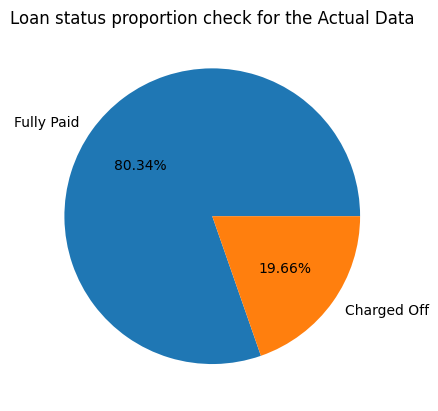

loan_status
Fully Paid     309056
Charged Off     75643
Name: count, dtype: int64

In [126]:
loan_satus_count = new_df['loan_status'].value_counts() 
plt.pie(loan_satus_count, autopct='%0.2f%%', labels=['Fully Paid', 'Charged Off']) 
plt.title('Loan status proportion check for the Actual Data') 
plt.show() 
loan_satus_count

## Preparing the target feature

In [127]:
new_df['loan_status'] = label_encoder.fit_transform(new_df['loan_status'])

In [128]:
new_df.loan_status.value_counts()

loan_status
1    309056
0     75643
Name: count, dtype: int64

## Data Preperation for modeling.

In [129]:
X = new_df.drop('loan_status', axis=1) 
y= new_df.loc[:,'loan_status']

In [130]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384699 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   384699 non-null  float64
 1   term                        384699 non-null  int32  
 2   int_rate                    384699 non-null  float64
 3   installment                 384699 non-null  float64
 4   grade                       384699 non-null  int32  
 5   sub_grade                   384699 non-null  int32  
 6   home_ownership              384699 non-null  int32  
 7   annual_inc                  384699 non-null  float64
 8   verification_status         384699 non-null  int32  
 9   purpose                     384699 non-null  int32  
 10  dti                         384699 non-null  float64
 11  open_acc                    384699 non-null  float64
 12  pub_rec                     384699 non-null  float64
 13  revol_bal          

In [131]:
print(X.shape)
print(y.shape)

(384699, 25)
(384699,)


## Spliting the data into train test:

In [132]:
# Import library
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 43)

In [133]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(307759, 25)
(307759,)
(38470, 25)
(38470,)
(38470, 25)
(38470,)


In [134]:
y_train.value_counts()

loan_status
1    247283
0     60476
Name: count, dtype: int64

In [135]:
print(f'Traning Data:\n{y_train.value_counts()}\n\nValidation Data:\n{y_val.value_counts()}\n\nTesting Data:\n{y_test.value_counts()}')

Traning Data:
loan_status
1    247283
0     60476
Name: count, dtype: int64

Validation Data:
loan_status
1    30875
0     7595
Name: count, dtype: int64

Testing Data:
loan_status
1    30898
0     7572
Name: count, dtype: int64


## Handling unbalance data.

In [136]:
# Balance data using SMOTE technique
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [137]:
print(f'Training data:{y_train.value_counts()}')

Training data:loan_status
1    247283
0    247283
Name: count, dtype: int64


## Assumption of Multicolinearity (Check using VIF score)

- VIF > 10: High multicollinearity (problematic).
- VIF between 5 and 10: Moderate multicollinearity (needs attention).
- VIF < 5: Low multicollinearity (acceptable).

In [138]:
# Check the collinearity among variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(pd.DataFrame(vif_data))

                      Variable            VIF
0                    loan_amnt     253.498693
1                         term     130.322930
2                     int_rate     273.852332
3                  installment     224.314926
4                        grade      44.291026
5                    sub_grade     164.490936
6               home_ownership       6.037050
7                   annual_inc       5.478171
8          verification_status       2.996538
9                      purpose       2.633096
10                         dti       8.983864
11                    open_acc      13.831211
12                     pub_rec       1.969066
13                   revol_bal       2.372349
14                  revol_util       8.967894
15                   total_acc      13.734454
16         initial_list_status       1.548827
17            application_type     559.033114
18                    mort_acc       5.044630
19        pub_rec_bankruptcies       2.042851
20                  issue_year  10

In [139]:
X_train = X_train.drop(columns= ['installment' , 'sub_grade','int_rate'])

In [140]:
# Again check
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(pd.DataFrame(vif_data))

                      Variable            VIF
0                    loan_amnt       7.174971
1                         term      28.875958
2                        grade       5.204528
3               home_ownership       6.031238
4                   annual_inc       5.458766
5          verification_status       2.987212
6                      purpose       2.613159
7                          dti       8.941042
8                     open_acc      13.809866
9                      pub_rec       1.966864
10                   revol_bal       2.365484
11                  revol_util       8.737911
12                   total_acc      13.725001
13         initial_list_status       1.486703
14            application_type     558.769257
15                    mort_acc       5.026619
16        pub_rec_bankruptcies       2.041563
17                  issue_year  109506.606520
18             issue_month_num       4.974073
19       earliest_cr_line_year  108159.246980
20  earliest_cr_line_month_num    

In [141]:
X_train = X_train.drop(columns= ['application_type' , 'issue_year','earliest_cr_line_year'])

In [142]:
# Again check
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(pd.DataFrame(vif_data))

                      Variable        VIF
0                    loan_amnt   7.130673
1                         term  21.245358
2                        grade   4.929077
3               home_ownership   4.723205
4                   annual_inc   5.282405
5          verification_status   2.982722
6                      purpose   2.430209
7                          dti   8.592956
8                     open_acc  13.224391
9                      pub_rec   1.961270
10                   revol_bal   2.281776
11                  revol_util   7.644911
12                   total_acc  13.268977
13         initial_list_status   1.484377
14                    mort_acc   4.602609
15        pub_rec_bankruptcies   2.035358
16             issue_month_num   4.645283
17  earliest_cr_line_month_num   4.834220
18              emp_length_yrs   4.327492


In [143]:
X_train = X_train.drop(columns= ['term' , 'open_acc','dti'])

In [144]:
# Again check
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(pd.DataFrame(vif_data))

                      Variable       VIF
0                    loan_amnt  6.240412
1                        grade  4.129080
2               home_ownership  4.293061
3                   annual_inc  4.771673
4          verification_status  2.966402
5                      purpose  2.413948
6                      pub_rec  1.960416
7                    revol_bal  2.198034
8                   revol_util  6.810439
9                    total_acc  6.634582
10         initial_list_status  1.467106
11                    mort_acc  4.358343
12        pub_rec_bankruptcies  2.030639
13             issue_month_num  4.474757
14  earliest_cr_line_month_num  4.658517
15              emp_length_yrs  4.220827


In [145]:
X_val = X_val.drop(columns= ['installment' , 'sub_grade','int_rate','application_type' , 'issue_year','earliest_cr_line_year','term' , 'open_acc','dti'])
X_test = X_test.drop(columns= ['installment' , 'sub_grade','int_rate','application_type' , 'issue_year','earliest_cr_line_year','term' , 'open_acc','dti'])

## Data scaling:

In [146]:
# # Standardize the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Initialize StandardScaler
scaler = MinMaxScaler()

# Fit and transform the dataset
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.fit_transform(X_val)
X_test_sc = scaler.fit_transform(X_test)

In [147]:
X_train = pd.DataFrame(X_train_sc, columns = X_train.columns)
X_val = pd.DataFrame(X_val_sc, columns = X_val.columns)
X_test = pd.DataFrame(X_test_sc, columns = X_test.columns)

## Basic model:

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training set
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [149]:
pd.Series((zip(X.columns, model.coef_[0])))

0               (loan_amnt, -1.4004113857161722)
1                      (term, -2.05656499389649)
2                (int_rate, 0.24885028584920652)
3               (installment, 7.545819850361992)
4                    (grade, 0.6479223752125044)
5                (sub_grade, 0.3020406317441298)
6          (home_ownership, -0.6519588513877339)
7               (annual_inc, 1.0792058565413305)
8     (verification_status, -0.8592657346573748)
9                (purpose, -0.49677122225223086)
10                     (dti, 0.7981390300610816)
11               (open_acc, 0.42328434877302235)
12                (pub_rec, -1.2905949665318397)
13              (revol_bal, 0.48631652802873593)
14             (revol_util, 0.40638548228909566)
15              (total_acc, 0.19172583380945224)
dtype: object

In [150]:
yval_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, yval_pred)
# Classification report:
classification_rep = classification_report(y_val, yval_pred)

print("Accuracy:", accuracy)
print('-'*50)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.6146087860670653
--------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.55      0.36      7595
           1       0.85      0.63      0.72     30875

    accuracy                           0.61     38470
   macro avg       0.56      0.59      0.54     38470
weighted avg       0.74      0.61      0.65     38470



## Adjusted R2 score:

In [151]:
n , d =X_val.shape
print("Number of Rows:",n,"Features",d)
r2 = model.score(X_val, y_val)
r2
Numerator = (1-r2)*(n-1)
Denominator = (n-d-1)
adj2 = 1 - (Numerator/Denominator)
print('ADJ_R2:',adj2)

Number of Rows: 38470 Features 16
ADJ_R2: 0.6144484277225166


## Actual and predicted values for the validation Data

In [152]:
validation_df = pd.DataFrame({
    "Actual": y_val,
    "Predicted": yval_pred
})
validation_df[:10]

,Actual,Predicted
200631,1,1
200837,1,0
351099,0,0
298957,0,0
317094,0,1
173228,1,0
318454,1,1
302564,1,0
223134,0,1
350690,1,1


[[ 4200  3395]
 [11431 19444]]
Confusion Matrix:
--------------------------------------------------


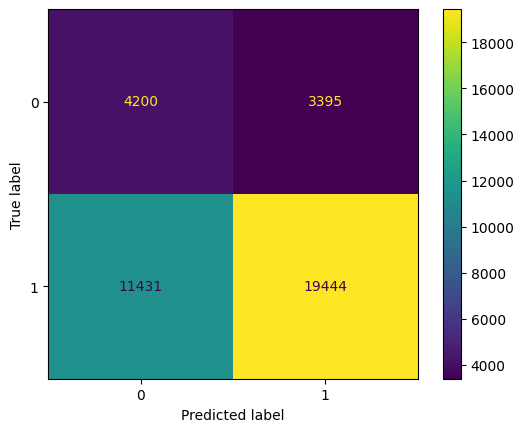

In [153]:
conf_matrix = confusion_matrix(y_val, yval_pred)
print(conf_matrix)
print("Confusion Matrix:")
print('-'*50)
ConfusionMatrixDisplay(conf_matrix).plot();

### Precision Score / Recall score/ F1 Score
- precision score = tp/ (tp+fp)

In [154]:
precision_score = 19444 * 100/(19444+3395)
print('precision_score', precision_score)

### Recall Score

recall_score = 19444 * 100 / (19444 +11431)
print('recall_score',recall_score)

### F1 Score

f1_score = 2 * precision_score * recall_score/(precision_score + recall_score)
print('f1_score',f1_score)

precision_score 85.13507596654844
recall_score 62.97651821862348
f1_score 72.39825743753957


## Checking the Probabilites for the Class 0 and Class 1:

In [155]:
Probability = model.predict_proba(X_test)
Probability[:10]

array([[0.56796215, 0.43203785],
       [0.63960598, 0.36039402],
       [0.4243183 , 0.5756817 ],
       [0.42412613, 0.57587387],
       [0.3689012 , 0.6310988 ],
       [0.28163786, 0.71836214],
       [0.41545199, 0.58454801],
       [0.3758503 , 0.6241497 ],
       [0.19292294, 0.80707706],
       [0.46149031, 0.53850969]])

In [156]:
probabilities = Probability[:, 1]
probabilities

array([0.43203785, 0.36039402, 0.5756817 , ..., 0.48140311, 0.79506897,
       0.30059902])

## Plot ROC CURVE:

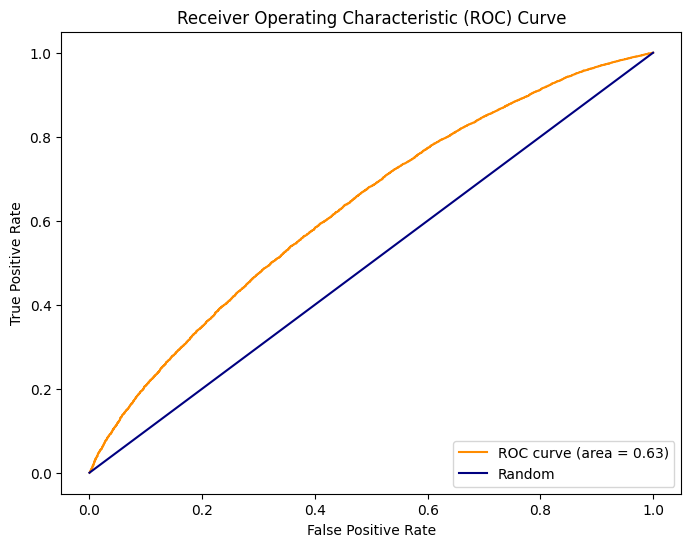

In [157]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right');

## Precision Recalll Curve:

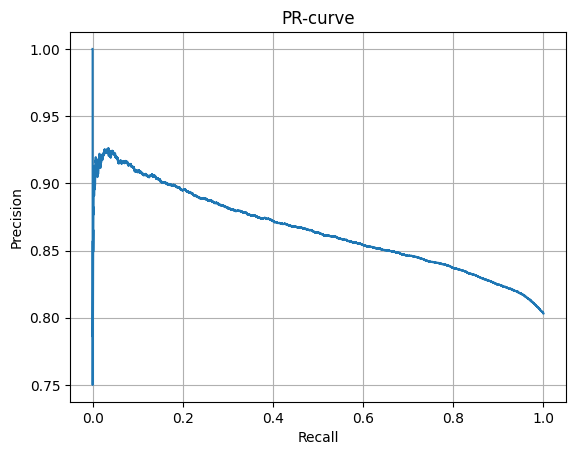

In [158]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test, probabilities)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-curve')
plt.grid()
plt.show()

##  Hyperparameter tunning with regularization:

In [159]:
from sklearn.metrics import accuracy_score
train_scores = [] 
val_scores = [] 

for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda  
    lr = LogisticRegression(C = 1/la, max_iter = 1000)  
    lr.fit(X_train, y_train)  
    train_score = accuracy_score(y_train, lr.predict(X_train))  
    val_score = accuracy_score(y_val, lr.predict(X_val))  
    
    train_scores.append(train_score)  
    val_scores.append(val_score)

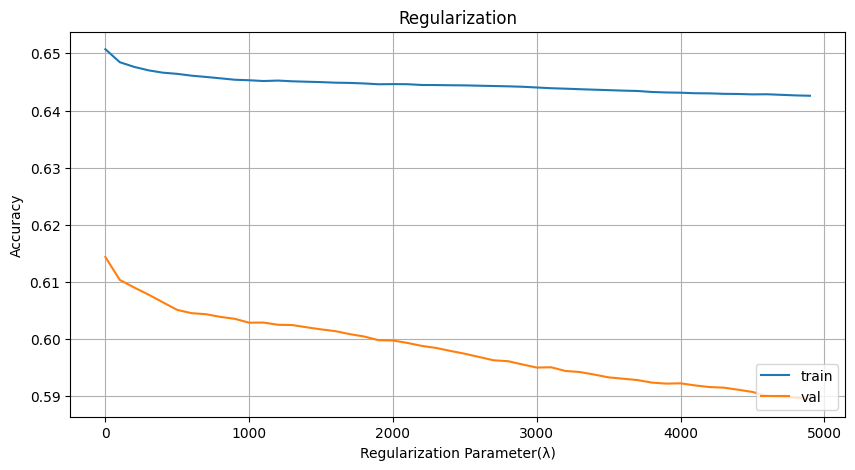

In [160]:
plt.figure(figsize=(10,5)) 
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label = "train") 
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label = "val") 
plt.legend(loc = 'lower right') 
plt.title('Regularization') 
plt.xlabel("Regularization Parameter(λ)") 
plt.ylabel("Accuracy") 
plt.grid() 
plt.show()

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 500, 1000]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,  # Use all available processors
    verbose=1   # Display progress
)

# Fit the model
grid_search.fit(X_train, y_train)

# Extract the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_model = LogisticRegression(
    penalty=best_params['penalty'],
    C=best_params['C'],
    solver=best_params['solver'],
    class_weight=best_params['class_weight'],
    max_iter=best_params['max_iter']
)
best_model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
val_accuracy = accuracy_score(y_val, best_model.predict(X_val))
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Parameters: {'C': 10, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Train Accuracy: 0.6511
Validation Accuracy: 0.5749


In [162]:
# param_grid = {
#     'penalty': ['l1', 'l2', 'elasticnet'],
#     'C': [0.01, 0.1, 1, 10, 100],
#     'solver': ['liblinear', 'saga'],
#     'class_weight': [None, 'balanced'],
#     'max_iter': [100, 500, 1000]
# }
# grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy', cv=5)
# grid_search.fit(X_train, y_train)


LR train score: 0.6506209484679497
LR val score: 0.6146087860670653

Confusion Matrix: 
[[ 4200  3395]
 [11431 19444]]


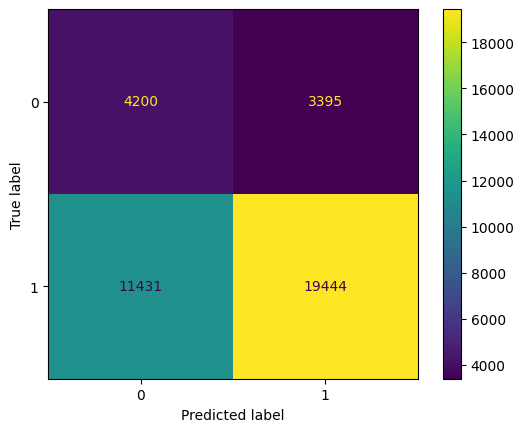

fbeta score : beta : 0.5
0.795379240945423
              precision    recall  f1-score   support

           0       0.19      0.40      0.26      7572
           1       0.80      0.59      0.68     30898

    accuracy                           0.56     38470
   macro avg       0.50      0.50      0.47     38470
weighted avg       0.68      0.56      0.60     38470



In [166]:
from sklearn.linear_model import LogisticRegression
logistic_reg_model = LogisticRegression(
    penalty='l2',         # L2 - ridge regularisation
    dual=False,
    tol=0.0001,
    C=1.0,             # 1/lambda :
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=1000,          # 1000 iterations for learning
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,)

logistic_reg_model.fit(X_train,y_train)
print("LR train score:",logistic_reg_model.score(X_train,y_train))
print("LR val score:",logistic_reg_model.score(X_val ,y_val))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_predicted = logistic_reg_model.predict(X_val)

print()
print("Confusion Matrix: ")
print(confusion_matrix(y_val ,y_predicted ))

ConfusionMatrixDisplay(confusion_matrix(y_val ,y_predicted ),
                      display_labels=[0,1]).plot()

plt.show()

from sklearn.metrics import f1_score,precision_score,recall_score,fbeta_score
from sklearn.metrics import classification_report

print("fbeta score : beta : 0.5")
print(fbeta_score(y_true = y_val,
    y_pred = y_predicted,
    beta = 0.5))



print(classification_report(y_test, y_predicted))


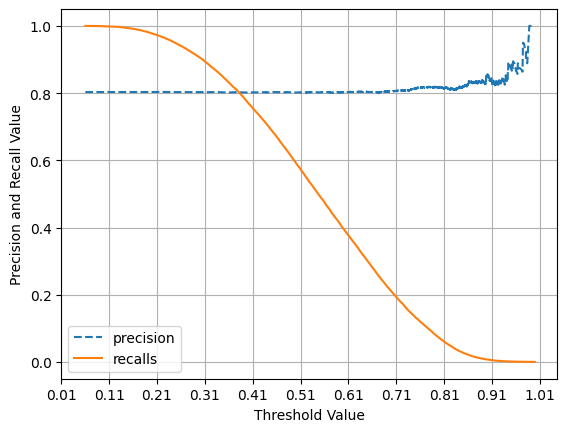

None
Precision at theshold 0.6 is :  0.8702816254184993


In [167]:
def precision_recall_curve_plot(y_val, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_val, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()
    
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import precision_recall_curve

print(precision_recall_curve_plot(y_test, logistic_reg_model.predict_proba(X_val)[:,1]))
plt.show()



def custom_predict(X, threshold):
        probs = logistic_reg_model.predict_proba(X)
        return (probs[:, 1] > threshold).astype(int)

# print(model.predict_proba(X_test))
threshold = 0.60

new_preds = custom_predict(X=X_val, threshold = threshold)


print(f"Precision at theshold {threshold} is : ",precision_score(y_val,new_preds))






fbeta score : beta : 0.5 0.7220037687758014
              precision    recall  f1-score   support

           0       0.20      0.60      0.30      7572
           1       0.80      0.40      0.53     30898

    accuracy                           0.44     38470
   macro avg       0.50      0.50      0.41     38470
weighted avg       0.68      0.44      0.48     38470



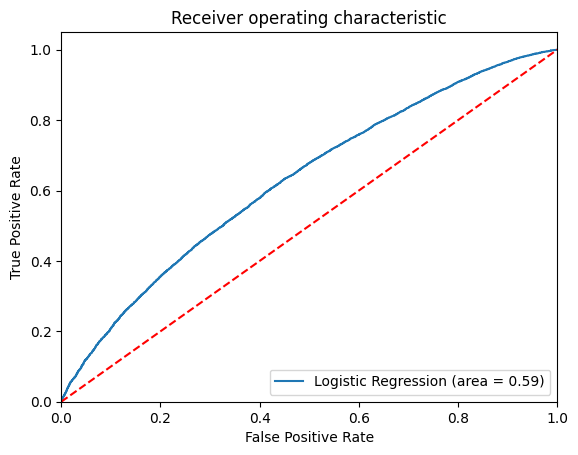

In [169]:
print("fbeta score : beta : 0.5",fbeta_score(y_true = y_val, y_pred = new_preds,
                                                beta = 0.5))
print(classification_report(y_test, new_preds))

logit_roc_auc = roc_auc_score(y_val, logistic_reg_model.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, logistic_reg_model.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [176]:
#!pip install optuna
!pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 932.9 kB/s eta 0:00:02
   ----------------- ---------------------- 0.8/1.8 MB 1.0 MB/s eta 0:00:02
   ---------------------------- ----------- 1.3/1.8 MB 1.3 MB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.8 MB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 1.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: To modify pip, please run the following command:
C:\Users\ANIL\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [179]:
import optuna
def objective(trial):
    C = trial.suggest_loguniform('C', 0.01, 100)
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
    model = LogisticRegression(C=C, solver=solver, max_iter=1000)
    model.fit(X_train, y_train)
    return accuracy_score(y_val, model.predict(X_val))
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2025-01-04 18:36:42,499] A new study created in memory with name: no-name-163eba81-595c-46e9-b388-3f7d09d9c775
[I 2025-01-04 18:36:53,412] Trial 0 finished with value: 0.5735378216792306 and parameters: {'C': 64.12369978944974, 'solver': 'saga'}. Best is trial 0 with value: 0.5735378216792306.
[I 2025-01-04 18:37:03,744] Trial 1 finished with value: 0.5887184819339746 and parameters: {'C': 0.8740011507166856, 'solver': 'saga'}. Best is trial 1 with value: 0.5887184819339746.
[I 2025-01-04 18:37:15,273] Trial 2 finished with value: 0.5745256043670393 and parameters: {'C': 13.585590311008044, 'solver': 'saga'}. Best is trial 1 with value: 0.5887184819339746.
[I 2025-01-04 18:37:22,386] Trial 3 finished with value: 0.6042630621263322 and parameters: {'C': 0.1606936231522743, 'solver': 'saga'}. Best is trial 3 with value: 0.6042630621263322.
[I 2025-01-04 18:37:28,834] Trial 4 finished with value: 0.5827397972446062 and parameters: {'C': 1.6462343491211828, 'solver': 'liblinear'}. Best 

#### MinMaxScaler -

For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.

MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data.

#### ROC Curve -

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- True Positive Rate
- False Positive Rate

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

- TPR=(TP)/(TP+FN)

False Positive Rate (FPR) is defined as follows:

- FPR=(FP)/(FP+TN)

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

#### AUC (Area under the ROC Curve) -

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).


AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions:

### Multicollinearity check using Variance Inflation Factor (VIF) -

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.

Multicollinearity can be detected via various methods. One such method is Variance Inflation Factor aka VIF.
In VIF method, we pick each independent feature and regress it against all of the other independent features.
VIF score of an independent variable represents how well the variable is explained by other independent variables.

VIF = 1/1-R2